# Self-Propagation figures on SNN

In [163]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xlrd
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import os
from sklearn import linear_model

In [164]:
def to_percent(temp, position):
    return '%1.f'%(100*temp) + '%'
def extract(inpath,col):
    data = xlrd.open_workbook(inpath, encoding_override='utf-8')
    table = data.sheets()[0]
    nrows = table.nrows
    ncols = table.ncols
    result=[]
    for i in range(0, nrows):
        alldata = table.row_values(i)
        item = alldata[col]
        result.append(item)
    return result

def extractTXT(inpath,col):
    dataindex = 0
    with open(inpath, "r") as f:
        datas = f.readlines()
        for line in datas:
            dataindex += 1
            if 'plot' in line:
                break
        if dataindex!=0 and dataindex!=len(datas):
            accdata = datas[dataindex:-1]
            acclist = []
            for accstr in accdata:
                lineacc = accstr.strip('\n').split('\t')
                if 'NaN' in lineacc[col]:
                    acclist.append(1)
                else:
                    acclist.append(float(lineacc[col]))
            return acclist
        else:
            print('somthing error')
            
def extract_txt(root_dir, file_dir, mode):
    file = open(os.path.join(root_dir, file_dir), 'r')
    f = file.readlines()[-100:]
    f_list = []
    for i in range(len(f)):
        a = f[i].split(' \n')[0].split(' \t ')
        a_list = [float(a[1]), float(a[3]), float(a[5]), float(a[7]), float(a[9]), float(a[11])]
        f_list.append(a_list)
    f_list = np.array(f_list)
    error_test = f_list[:,5].tolist()
    error_train = f_list[:,2].tolist()
    if mode == 'test':
        return error_test
    if mode == 'train':
        return error_train
    
def extract_txt1000(root_dir, file_dir, mode):
    file = open(os.path.join(root_dir, file_dir), 'r')
    f = file.readlines()[43:]
    f_list = []
    for i in range(len(f)):
        a = f[i].split(' \n')[0].split(' \t ')
        a_list = [float(a[1]), float(a[3]), float(a[5]), float(a[7]), float(a[9]), float(a[11])]
        f_list.append(a_list)
    f_list = np.array(f_list)
    error_test = f_list[:,5].tolist()
    error_train = f_list[:,2].tolist()
    if mode == 'test':
        return error_test
    if mode == 'train':
        return error_train

def extract_txt_NRR(root, file):
    file = os.path.join(root,file)
    f = open(file, 'r')
    f = f.readlines()
    data = []
    for i in range(len(f)):
        if 'tensor' in f[i]: f[i] = f[i].replace('tensor([','').replace('])','')
        data.append(1- float(f[i].split('\n')[0].split(' ')[-1])/100)
    return data
def extract_txt_Dieh_SOM(root, file):
    file = os.path.join(root,file)
    f = open(file, 'r')
    f = f.readlines()
    data = np.zeros(len(f))
    for i in range(len(f)):
        data[i] = 1- float(f[i].split('\n')[0].split(' ')[-2])
    data = smooth_array(data, N=5)
    x = np.floor(np.linspace(0, data.shape[0]-1, 100)).astype(int)
    data = data[x]
    return data
def smooth_matrix(dieh, N=6):
    dieh_ime = np.zeros(dieh.shape)
    for i in range(dieh.shape[0]):
        for j in range(dieh.shape[1]):
            if j < N: dieh_ime[i,j] = dieh[i,j].copy()
            else: dieh_ime[i,j] = dieh[i,j-N:j].mean()
    return dieh_ime
def smooth_array(dieh, N=6):
    dieh_ime = np.zeros(dieh.shape)
    for j in range(dieh.shape[0]):
        if j < N: dieh_ime[j] = dieh[j].copy()
        else: dieh_ime[j] = dieh[j-N:j].mean()
    return dieh_ime
def extract_txt_snu(root, file):
    f = open(os.path.join(root, file), 'r')
    f = f.readlines()
    acc = []
    for k in range(len(f)):
        if 'test correct:' in f[k]: 
            acc.append(1-float(f[k].split('y: ')[-1].split('%')[0])/100)
    return acc
def mybar(ax, ours1, ours2, le=None):
    if le==1:
        for i in range(len(methods)):
            if i<ours1: ax.bar(i,values[i], width=.5, facecolor='#4472AE',edgecolor='black',hatch='/')
            if i==ours1: ax.bar(i,values[i], width=.5, facecolor='#E87F29',edgecolor='black',hatch='/',label='Based on plasticity')
            if i<ours2 and i>ours1: ax.bar(i,values[i], width=.5, facecolor='#4472AE',edgecolor='black',hatch='\\') 
            if i==ours2: ax.bar(i,values[i], width=.5, facecolor='#E87F29',edgecolor='black',hatch='\\',label='Based on gradient')
        plt.legend(loc='upper left',frameon=False)
    else:
        for i in range(len(methods)):
            if i<ours1: ax.bar(i,values[i], width=.5, facecolor='#4472AE',edgecolor='black',hatch='/')
            if i==ours1: ax.bar(i,values[i], width=.5, facecolor='#E87F29',edgecolor='black',hatch='/')
            if i<ours2 and i>ours1: ax.bar(i,values[i], width=.5, facecolor='#4472AE',edgecolor='black',hatch='\\') 
            if i==ours2: ax.bar(i,values[i], width=.5, facecolor='#E87F29',edgecolor='black',hatch='\\')

## With or without SBP in training set for SNN.

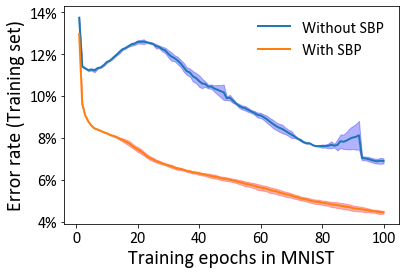

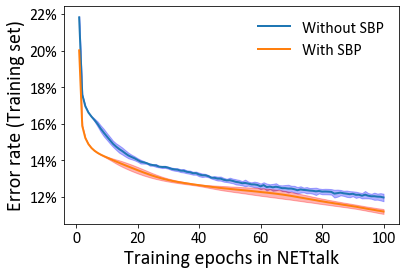

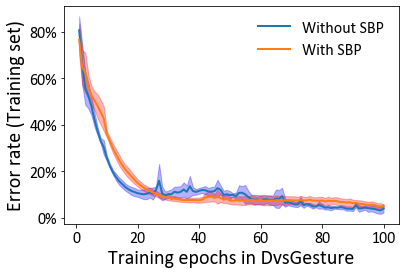

In [81]:
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145537_mnist_symmetricSTDP.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_mnist_symmetricSTDP_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_mnist_symmetricSTDP_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_mnist_symmetricSTDP_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_mnist_symmetricSTDP_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
cal_copy = np.zeros((5, 100))
cal_copy = np.array(error_list).copy()
for j in range(5):
    for i in range(len(np.where(cal_std>=0.013)[0])):
        model = linear_model.LinearRegression()
        X = np.arange(np.where(cal_std>=0.013)[0][i]-5,np.where(cal_std>=0.013)[0][i]).reshape(-1, 1)
        Y = cal_copy[j,np.where(cal_std>=0.013)[0][i]-5:np.where(cal_std>=0.013)[0][i]].reshape(-1, 1)
        model.fit(X, Y)
        a = model.predict(np.where(cal_std>=0.013)[0][i].reshape(-1,1))
        cal_copy[j,np.where(cal_std>=0.013)[0][i]] = a.copy()
cal_mean    = cal_copy.mean(0)
cal_std = cal_copy.std(0)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145537_mnist_SP.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_mnist_SP_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_mnist_SP_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_mnist_SP_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_mnist_SP_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)# ,bbox_to_anchor=(1.4, 1)
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# fig.savefig('Figure/SBP_train_MNIST.svg')

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_nettalk_symmetricSTDP.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_nettalk_symmetricSTDP_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_nettalk_symmetricSTDP_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_nettalk_symmetricSTDP_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_nettalk_symmetricSTDP_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_nettalk_SP.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_nettalk_SP_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_nettalk_SP_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_nettalk_SP_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_nettalk_SP_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in NETtalk',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# fig.savefig('Figure/SBP_train_NETTalk.svg')

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_guesture_symmetricSTDP.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_guesture_symmetricSTDP_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_guesture_symmetricSTDP_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_guesture_symmetricSTDP_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_guesture_symmetricSTDP_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_guesture_SP.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_guesture_SP_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_guesture_SP_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_guesture_SP_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_guesture_SP_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in DvsGesture',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# fig.savefig('Figure/SBP_train_DVSGesture.svg')

## With or without SBP in testing set for SNN.

### line figure

without SBP mni: 0.06248356319999998 0.005180348965061207 90
with SBP mni: 0.04862 0.0012302845199383763 99
without SBP net: 0.1573802 0.0019999325388622455 75
with SBP net: 0.14416299999999999 0.0010786901315947858 99
without SBP dvs: 0.16559720000000003 0.0016071941264203323 69
with SBP dvs: 0.15237499999999998 0.0003869625304858394 92


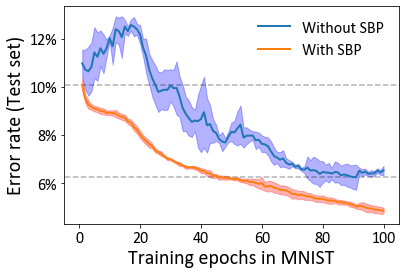

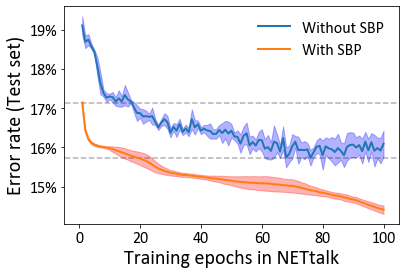

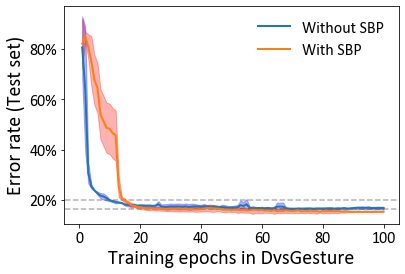

In [165]:
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145537_mnist_symmetricSTDP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_mnist_symmetricSTDP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_mnist_symmetricSTDP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_mnist_symmetricSTDP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_mnist_symmetricSTDP_512.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
cal_copy = np.zeros((5, 100))
cal_copy = np.array(error_list).copy()
for j in range(5):
    for i in range(len(np.where(cal_std>=0.027)[0])):
        model = linear_model.LinearRegression()
        X = np.arange(np.where(cal_std>=0.027)[0][i]-5,np.where(cal_std>=0.027)[0][i]).reshape(-1, 1)
        Y = cal_copy[j,np.where(cal_std>=0.027)[0][i]-5:np.where(cal_std>=0.027)[0][i]].reshape(-1, 1)
        model.fit(X, Y)
        a = model.predict(np.where(cal_std>=0.027)[0][i].reshape(-1,1))
        cal_copy[j,np.where(cal_std>=0.027)[0][i]] = a.copy()
cal_mean    = cal_copy.mean(0)
cal_M1 = cal_mean
cal_std = cal_copy.std(0)
print('without SBP mni:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])
cal_std[np.where(cal_std>0.1)] = 0.1
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list =[]
error_list.append(extract('data/fig2aei/log/log_20200429T145537_mnist_SP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_mnist_SP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_mnist_SP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_mnist_SP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_mnist_SP_512.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max())
plt.xlim([-5, 105])
plt.hlines(max_, -10, 110, color='k',linestyle='--',alpha=.3)
plt.hlines(min_, -10, 110, color='k',linestyle='--',alpha=.3)
print('with SBP mni:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])
fig.savefig('Figure/SBP_test_MNIST.svg')

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_nettalk_symmetricSTDP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_nettalk_symmetricSTDP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_nettalk_symmetricSTDP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_nettalk_symmetricSTDP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_nettalk_symmetricSTDP_512.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
print('without SBP net:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_nettalk_SP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_nettalk_SP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_nettalk_SP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_nettalk_SP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_nettalk_SP_512.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in NETtalk',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max(), 0.2)
plt.xlim([-5, 105])
plt.hlines(max_, -10, 110, color='k',linestyle='--',alpha=.3)
plt.hlines(min_, -10, 110, color='k',linestyle='--',alpha=.3)
print('with SBP net:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])
fig.savefig('Figure/SBP_test_NETTalk.svg')

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_guesture_symmetricSTDP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_guesture_symmetricSTDP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_guesture_symmetricSTDP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_guesture_symmetricSTDP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_guesture_symmetricSTDP_512.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
print('without SBP dvs:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_guesture_SP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_guesture_SP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_guesture_SP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_guesture_SP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_guesture_SP_512.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
cal_std[np.where(cal_std>0.1)] = 0.1
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in DvsGesture',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max(), 0.2)
plt.xlim([-5, 105])
plt.hlines(max_, -10, 110, color='k',linestyle='--',alpha=.3)
plt.hlines(min_, -10, 110, color='k',linestyle='--',alpha=.3)
print('with SBP dvs:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])
fig.savefig('Figure/SBP_test_DVSGesture.svg')

### energy plot

      Without SBP  With SBP
mean      1.91595  0.879270
std       0.27044  0.090867


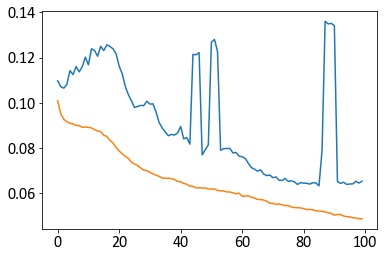

      Without SBP  With SBP
mean     4.466880  0.911520
std      0.426653  0.371721


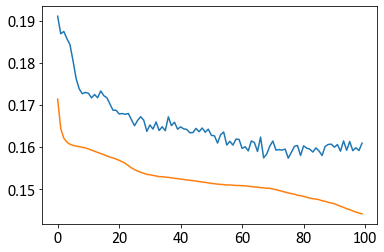

      Without SBP  With SBP
mean     1.526373  0.922040
std      0.395524  0.029303


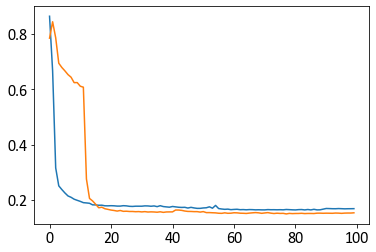

[[0.93674    0.95138   ]
 [0.8426198  0.855837  ]
 [0.83560167 0.850046  ]]
[[0.00402969 0.00123028]
 [0.00199993 0.00107869]
 [0.00246669 0.00109275]]


In [175]:
ENERGY_MEAN = np.zeros((3, 2))
ENERGY_STD = np.zeros((3, 2))
ACCURACY_BEST = np.zeros((3, 2))
ACCURACY_STD = np.zeros((3, 2))
m,n,k,T = 784, 500, 10, 5
cost={}
cost['SNN-SBP_MNIST'] = m*n+n*k+n
cost['SNN-SBP_MNIST'] = m*n+n*k+n
cost['SNN-SBP_MNIST'] = m*n+n*k+n
m,n,k,T = 189, 500, 26, 5
cost['SNN-SBP_NETTalk'] = m*n+n*k+n
cost['SNN-SBP_NETTalk'] = m*n+n*k+n
cost['SNN-SBP_NETTalk'] = m*n+n*k+n
m,n,k,T = 1024, 500, 11, 5
cost['SNN-SBP_DvsGesture'] = m*n+n*k+n
cost['SNN-SBP_DvsGesture'] = m*n+n*k+n
cost['SNN-SBP_DvsGesture'] = m*n+n*k+n
# MNIST
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145537_mnist_symmetricSTDP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_mnist_symmetricSTDP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_mnist_symmetricSTDP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_mnist_symmetricSTDP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_mnist_symmetricSTDP_512.txt','test'))
cal    = np.array(error_list)
plt.plot(cal.mean(0))
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145537_mnist_SP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_mnist_SP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_mnist_SP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_mnist_SP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_mnist_SP_512.txt','test'))
cal_sbp    = np.array(error_list)
plt.plot(cal_sbp.mean(0))
no_sbp_list = []
with_sbp_list = []
l = min(cal.shape[0], cal_sbp.shape[0])
for index in range(l):
    min_ = max(cal[index,:].min(), cal_sbp[index,:].min())
    max_ = min(cal[index,:].max(), cal_sbp[index,:].max())
    x = np.linspace(min_, max_, 5)
    no_sbp_list_sub = []
    with_sbp_list_sub = []
    for i in range(len(x)):
        no_sbp = np.where(cal[index,:] <= x[i])[0][0]     # epoch - 1
        with_sbp = np.where(cal_sbp[index,:] <= x[i])[0][0]  # epoch - 1
        no_sbp_list_sub.append(no_sbp+1)
        with_sbp_list_sub.append(with_sbp+1)
    no_sbp_list.append(no_sbp_list_sub)
    with_sbp_list.append(with_sbp_list_sub)
no_sbp_list = np.array(no_sbp_list)
with_sbp_list = np.array(with_sbp_list)
energy_no_sbp = no_sbp_list.mean(1)*cost['SNN-SBP_MNIST']/1e7
energy_with_sbp = with_sbp_list.mean(1)*cost['SNN-SBP_MNIST']/1e7
df = pd.DataFrame({'Without SBP':[energy_no_sbp.mean(0), energy_no_sbp.std(0)], 'With SBP':[energy_with_sbp.mean(0), energy_with_sbp.std(0)]}, index=['mean', 'std'])
ENERGY_MEAN[0] = [energy_no_sbp.mean(0), energy_with_sbp.mean(0)]
ENERGY_STD[0] = [energy_no_sbp.std(0), energy_with_sbp.std(0)]
ACCURACY_BEST[0] = [1-cal.mean(0).min(), 1-cal_sbp.mean(0).min()]
ACCURACY_STD[0] = [cal.std(0)[np.where(cal.mean(0) == cal.mean(0).min())[0][0]], cal_sbp.std(0)
                   [np.where(cal_sbp.mean(0) == cal_sbp.mean(0).min())[0][0]]]
print(df)
plt.show()

# NETtalk
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_nettalk_symmetricSTDP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_nettalk_symmetricSTDP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_nettalk_symmetricSTDP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_nettalk_symmetricSTDP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_nettalk_symmetricSTDP_512.txt','test'))
cal    = np.array(error_list)
plt.plot(cal.mean(0))
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_nettalk_SP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_nettalk_SP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_nettalk_SP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_nettalk_SP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_nettalk_SP_512.txt','test'))
cal_sbp    = np.array(error_list)
plt.plot(cal_sbp.mean(0))
no_sbp_list = []
with_sbp_list = []
l = min(cal.shape[0], cal_sbp.shape[0])
for index in range(l):
    min_ = max(cal[index,:].min(), cal_sbp[index,:].min())
    max_ = min(cal[index,:].max(), cal_sbp[index,:].max())
    x = np.linspace(min_, max_, 5)
    no_sbp_list_sub = []
    with_sbp_list_sub = []
    for i in range(len(x)):
        no_sbp = np.where(cal[index,:] <= x[i])[0][0]     # epoch - 1
        with_sbp = np.where(cal_sbp[index,:] <= x[i])[0][0]  # epoch - 1
        no_sbp_list_sub.append(no_sbp+1)
        with_sbp_list_sub.append(with_sbp+1)
    no_sbp_list.append(no_sbp_list_sub)
    with_sbp_list.append(with_sbp_list_sub)
no_sbp_list = np.array(no_sbp_list)
with_sbp_list = np.array(with_sbp_list)
energy_no_sbp = no_sbp_list.mean(1)*cost['SNN-SBP_NETTalk']/1e6
energy_with_sbp = with_sbp_list.mean(1)*cost['SNN-SBP_NETTalk']/1e6
df = pd.DataFrame({'Without SBP':[energy_no_sbp.mean(0), energy_no_sbp.std(0)], 'With SBP':[energy_with_sbp.mean(0), energy_with_sbp.std(0)]}, index=['mean', 'std'])
print(df)
ENERGY_MEAN[1] = [energy_no_sbp.mean(0), energy_with_sbp.mean(0)]
ENERGY_STD[1] = [energy_no_sbp.std(0), energy_with_sbp.std(0)]
ACCURACY_BEST[1] = [1-cal.mean(0).min(), 1-cal_sbp.mean(0).min()]
ACCURACY_STD[1] = [cal.std(0)[np.where(cal.mean(0) == cal.mean(0).min())[0][0]], cal_sbp.std(0)
                   [np.where(cal_sbp.mean(0) == cal_sbp.mean(0).min())[0][0]]]
plt.show()

# DvsGesture
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_guesture_symmetricSTDP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_guesture_symmetricSTDP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_guesture_symmetricSTDP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_guesture_symmetricSTDP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_guesture_symmetricSTDP_512.txt','test')) 
cal    = np.array(error_list)
plt.plot(cal.mean(0))
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_guesture_SP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_guesture_SP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_guesture_SP_42.txt','test')) # not good
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_guesture_SP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_guesture_SP_512.txt','test')) # not good
cal_sbp    = np.array(error_list)
plt.plot(cal_sbp.mean(0))
no_sbp_list = []
with_sbp_list = []
l = min(cal.shape[0], cal_sbp.shape[0])
for index in range(l):
    min_ = max(cal[index,:].min(), cal_sbp[index,:].min())
    max_ = min(cal[index,:].max(), cal_sbp[index,:].max(), 0.2)
    x = np.linspace(min_, max_, 5)
    no_sbp_list_sub = []
    with_sbp_list_sub = []
    for i in range(len(x)):
        no_sbp = np.where(cal[index,:] <= x[i])[0][0]     # epoch - 1
        with_sbp = np.where(cal_sbp[index,:] <= x[i])[0][0]  # epoch - 1
        no_sbp_list_sub.append(no_sbp+1)
        with_sbp_list_sub.append(with_sbp+1)
    no_sbp_list.append(no_sbp_list_sub)
    with_sbp_list.append(with_sbp_list_sub)
no_sbp_list = np.array(no_sbp_list)
with_sbp_list = np.array(with_sbp_list)
energy_no_sbp = no_sbp_list.mean(1)*cost['SNN-SBP_DvsGesture']/1e7
energy_with_sbp = with_sbp_list.mean(1)*cost['SNN-SBP_DvsGesture']/1e7
df = pd.DataFrame({'Without SBP':[energy_no_sbp.mean(0), energy_no_sbp.std(0)], 'With SBP':[energy_with_sbp.mean(0), energy_with_sbp.std(0)]}, index=['mean', 'std'])
print(df)
ENERGY_MEAN[2] = [energy_no_sbp.mean(0), energy_with_sbp.mean(0)]
ENERGY_STD[2] = [energy_no_sbp.std(0), energy_with_sbp.std(0)]
ACCURACY_BEST[2] = [1-cal.mean(0).min(), 1-cal_sbp.mean(0).min()]
ACCURACY_STD[2] = [cal.std(0)[np.where(cal.mean(0) == cal.mean(0).min())[0][0]], cal_sbp.std(0)
                   [np.where(cal_sbp.mean(0) == cal_sbp.mean(0).min())[0][0]]]
plt.show()
print(ACCURACY_BEST)
print(ACCURACY_STD)

### bar figure

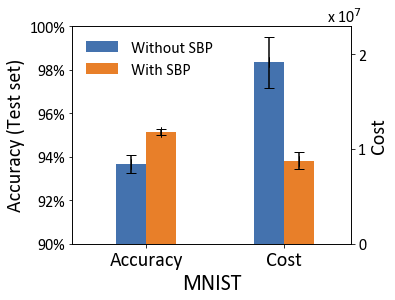

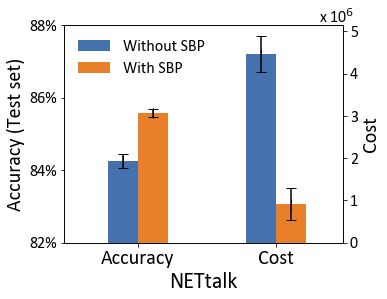

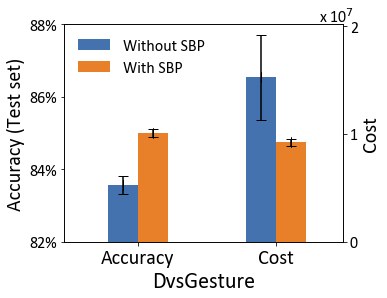

In [173]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xlrd
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import os
from sklearn import linear_model
def to_percent(temp, position):
    return '%1.f'%(100*temp) + '%'

plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 16
bar_width = 0.13 
positions = np.arange(2)
names = ['Accuracy', 'Cost']
scores = [ACCURACY_BEST[0][0],ACCURACY_BEST[0][1]] 
proges = [ENERGY_MEAN[0][0],ENERGY_MEAN[0][1]]
fig, ax1 = plt.subplots(figsize=(5,4))
ax1.bar(positions[0]+0.2, height = scores[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax1.bar(positions[0]+bar_width+0.2, height = scores[1], width=bar_width, color='#E87F29', label=u"With SBP")
ax1.errorbar([positions[0]+0.2,positions[0]+bar_width+0.2],[scores[0],scores[1]], fmt=" ", yerr=[ACCURACY_STD[0][0],ACCURACY_STD[0][1]], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)#elinewidth
ax1.errorbar(positions[0],0.1,yerr=0,xerr=0,color='w')
max_score = max(scores)
ax1.set_ylim(0.9, 1.0)
ax1.set_xlabel('MNIST',fontsize=22)
ax1.set_ylabel('Accuracy (Test set)', fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xticks([positions[0]+bar_width/2+0.2, positions[1]+ bar_width/2-0.2], names, fontsize=20)
ax2 = ax1.twinx()
ax2.bar(positions[1]-0.2, height = proges[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax2.bar(positions[1]+ bar_width-0.2, height = proges[1], width=bar_width, color='#E87F29', label="Without SBP")
ax2.errorbar([positions[1]-0.2,positions[1]+bar_width-0.2],[proges[0],proges[1]], fmt=" ", yerr=[ENERGY_STD[0][0],ENERGY_STD[0][1]], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax2.errorbar(positions[1]+0.1,0.1,yerr=0,xerr=0,color='w')
ax2.set_yticks([0,1,2])
ax2.set_ylabel('Cost', fontsize=20)
handles1, labels1 = ax1.get_legend_handles_labels()
plt.legend(handles1, labels1, loc='upper left',frameon=False)# ,bbox_to_anchor=(0.5,1))
plt.text(1.05, 2.34, 'x 10$^{7}$')
plt.show()
# fig.savefig('Figure/SBP_test_MNIST_bar.svg')


#NETtalk
bar_width = 0.13  
positions = np.arange(2)
names = ['Accuracy', 'Cost']
scores = [ACCURACY_BEST[1][0],ACCURACY_BEST[1][1]] 
proges = [ENERGY_MEAN[1][0],ENERGY_MEAN[1][1]]
fig, ax1 = plt.subplots(figsize=(5,4))
ax1.bar(positions[0]+0.2, height = scores[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax1.bar(positions[0]+bar_width+0.2, height = scores[1], width=bar_width, color='#E87F29', label=u"With SBP")
plt.errorbar([positions[0]+0.2,positions[0]+bar_width+0.2],[scores[0],scores[1]], fmt=" ", yerr=[ACCURACY_STD[1][0],ACCURACY_STD[1][1]], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax1.set_xticks(positions)
max_score = max(scores)
ax1.set_ylim(0.82, 0.88)
ax1.set_xlabel('NETtalk',fontsize=22)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
ax1.set_ylabel('Accuracy (Test set)', fontsize=20)
plt.xticks([positions[0]+bar_width/2+0.2, positions[1]+ bar_width/2-0.2], names, fontsize=20)
ax1.errorbar(positions[0],0.1,yerr=0,xerr=0,color='w')
ax2 = ax1.twinx()
ax2.bar(positions[1]-0.2, height = proges[0], width=bar_width, color='#4472AE', label=u"Without-SBP")
ax2.bar(positions[1]+ bar_width-0.2, height = proges[1], width=bar_width, color='#E87F29', label="Without-SBP")
plt.errorbar([positions[1]-0.2,positions[1]+bar_width-0.2],[proges[0],proges[1]], fmt=" ", yerr=[ENERGY_STD[1][0],ENERGY_STD[1][1]], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
max_proges = max(proges)
ax2.errorbar(positions[1]+0.1,0.1,yerr=0,xerr=0,color='w')
ax2.set_ylabel('Cost', fontsize=20)
handles1, labels1 = ax1.get_legend_handles_labels()
plt.legend(handles1, labels1, loc='upper left',frameon=False)#,bbox_to_anchor=(0.5,1))
plt.text(1.05, 5.2, 'x 10$^{6}$')
plt.show()
# fig.savefig('Figure/SBP_test_NETTalk_bar.svg')


# DvsGesture
bar_width = 0.13  
positions = np.arange(2)
names = ['Accuracy', 'Cost']
scores = [ACCURACY_BEST[2][0],ACCURACY_BEST[2][1]] 
proges = [ENERGY_MEAN[2][0],ENERGY_MEAN[2][1]]
fig, ax1 = plt.subplots(figsize=(5,4))
ax1.bar(positions[0]+0.2, height = scores[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax1.bar(positions[0]+bar_width+0.2, height = scores[1], width=bar_width, color='#E87F29', label=u"With SBP")
plt.errorbar([positions[0]+0.2,positions[0]+bar_width+0.2],[scores[0],scores[1]], fmt=" ", yerr=[ACCURACY_STD[2][0],ACCURACY_STD[2][1]], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax1.set_xticks(positions)
max_score = max(scores)
ax1.set_ylim(0.82, 0.88)
ax1.set_xlabel('DvsGesture',fontsize=22)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
ax1.set_ylabel('Accuracy (Test set)', fontsize=20)
plt.xticks([positions[0]+bar_width/2+0.2, positions[1]+ bar_width/2-0.2], names,fontsize=20)
ax1.errorbar(positions[0],0.1,yerr=0,xerr=0,color='w')
ax2 = ax1.twinx()
ax2.bar(positions[1]-0.2, height = proges[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax2.bar(positions[1]+ bar_width-0.2, height = proges[1], width=bar_width, color='#E87F29', label="Without SBP")
plt.errorbar([positions[1]-0.2,positions[1]+bar_width-0.2],[proges[0],proges[1]], fmt=" ", yerr=[ENERGY_STD[2][0],ENERGY_STD[2][1]], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
max_proges = max(proges)
ax2.errorbar(positions[1]+0.1,0.1,yerr=0,xerr=0,color='w')
ax2.set_ylabel('Cost', fontsize=20)
ax2.set_yticks([0,1,2])
handles1, labels1 = ax1.get_legend_handles_labels()
plt.legend(handles1, labels1, loc='upper left',frameon=False)#,bbox_to_anchor=(0.5,1))
plt.text(1.05, 2.04, 'x 10$^{7}$')
plt.show()
# fig.savefig('Figure/SBP_test_DVSGesture_bar.svg')

## With or without STP in training set for SNN.

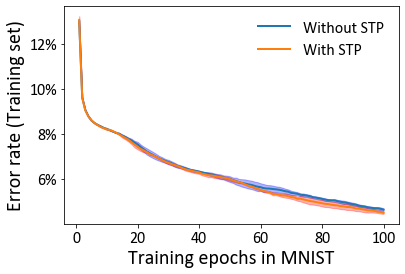

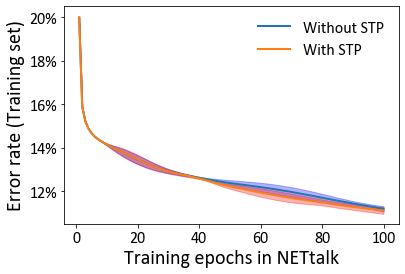

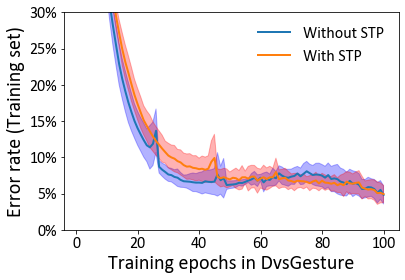

In [85]:
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_mnist_STP_0.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_mnist_STP_0_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_mnist_STP_0_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_mnist_STP_0_512.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_mnist_STP_0_3.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = np.array(error_list).std(0)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_mnist_STP_1.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_mnist_STP_1_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_mnist_STP_1_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_mnist_STP_1_512.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_mnist_STP_1_3.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = np.array(error_list).std(0)
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)# ,bbox_to_anchor=(1.4, 1)
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# fig.savefig('Figure/STP_train_MNIST.svg')


fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_nettalk_STP_0.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_nettalk_STP_0_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_nettalk_STP_0_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_nettalk_STP_0_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_nettalk_STP_0_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = np.array(error_list).std(axis=0)
# print(cal_std)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_nettalk_STP_1.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_nettalk_STP_1_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_nettalk_STP_1_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_nettalk_STP_1_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_nettalk_STP_1_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = np.array(error_list).std(0)
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)# ,bbox_to_anchor=(1.4, 1)
plt.xlabel('Training epochs in NETtalk',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# fig.savefig('Figure/STP_train_NETTalk.svg')

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_guesture_STP_0.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_guesture_STP_0_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_guesture_STP_0_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_guesture_STP_0_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_guesture_STP_0_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = np.array(error_list).std(0)
cal_std[np.where(cal_std>0.03)] = 0.03
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_guesture_STP_1.xlsx',5))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_guesture_STP_1_0.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_guesture_STP_1_42.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_guesture_STP_1_3.txt','train'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_guesture_STP_1_512.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = np.array(error_list).std(0)
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)
plt.ylim((0, 0.3))
plt.xlabel('Training epochs in DvsGesture',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# fig.savefig('Figure/STP_train_DVSGesture.svg')

## With or without STP in testing set for SNN.

without SBP mni: 0.05023999999999999 0.001403709371629327 98
with SBP mni: 0.04905999999999999 0.0016414627622946562 98
without SBP net: 0.14274199999999998 0.0012765058558424215 99
with SBP net: 0.14321219999999996 0.001210265822040764 98
without SBP dvs: 0.15413179999999999 0.0011383857694121137 94
with STP dvs: 0.15318740000000003 0.0024291369331513593 74


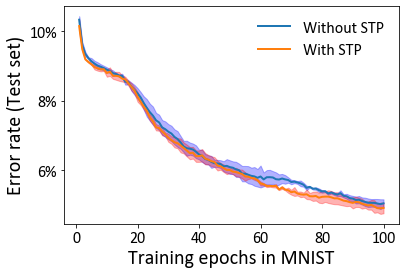

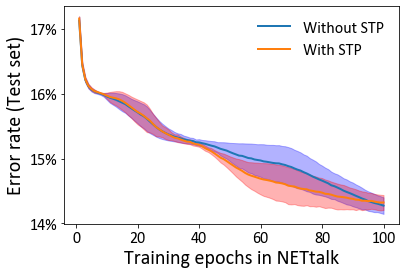

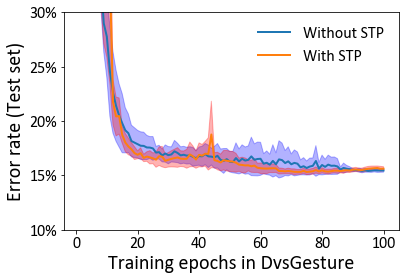

In [188]:
def to_percent(temp, position):
    return '%1.f'%(100*temp) + '%'
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_mnist_STP_0.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_mnist_STP_0_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_mnist_STP_0_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_mnist_STP_0_512.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_mnist_STP_0_3.txt','test'))
STP_MNIST_without = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
print('without SBP mni:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_mnist_STP_1.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_mnist_STP_1_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_mnist_STP_1_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_mnist_STP_1_512.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_mnist_STP_1_3.txt','test'))
STP_MNIST_with = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# fig.savefig('Figure/STP_test_MNIST.svg')
print('with SBP mni:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_nettalk_STP_0.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_nettalk_STP_0_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_nettalk_STP_0_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_nettalk_STP_0_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_nettalk_STP_0_512.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
print('without SBP net:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_nettalk_STP_1.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_nettalk_STP_1_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_nettalk_STP_1_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_nettalk_STP_1_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_nettalk_STP_1_512.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in NETtalk',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# fig.savefig('Figure/STP_test_NETTalk.svg')
print('with SBP net:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_guesture_STP_0.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_guesture_STP_0_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_guesture_STP_0_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_guesture_STP_0_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_guesture_STP_0_512.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
print('without SBP dvs:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])
error_list = []
error_list.append(extract('data/fig2cgk/log/log_20200429T145951_guesture_STP_1.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T132745_guesture_STP_1_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T115640_guesture_STP_1_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163139_guesture_STP_1_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T161155_guesture_STP_1_512.txt','test'))

cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
cal_std[np.where(cal_std > 0.1)] = 0.1
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With STP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=False)
plt.ylim((0.1, 0.3))
plt.xlabel('Training epochs in DvsGesture',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# fig.savefig('Figure/STP_test_DVSGesture.svg')
print('with STP dvs:',cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0][0]], np.where(cal_mean==cal_mean.min())[0][0])

# SBP grid search

Text(0, 0.5, 'Fraction factor $\\lambda_f$')

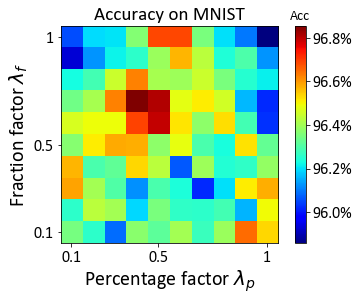

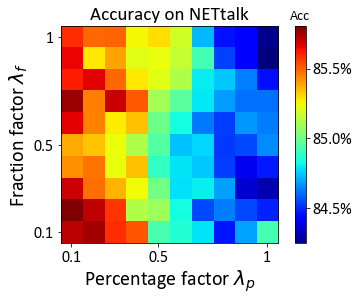

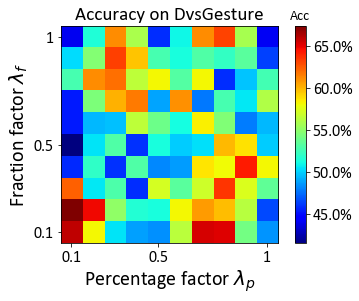

In [87]:
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
import numpy as np
import os
from matplotlib import colors
from matplotlib import ticker
def get_names(file_dir):
    for root, dirs, files in os.walk(file_dir):
        return files

path = 'data/range_fraction/mnist-nettalk-guesture-20200701/'
filenames = get_names(path)
matrix = np.ones((10,10,3))
aa = 0
bb = 0
for file in filenames:
    nontxtname = file[:-4]
    conts = nontxtname.split('_')
    task = conts[2]
    proprange = round(float(conts[3])/0.1)-1
    fractor = round(float(conts[4])/0.1)-1
    err = np.mean(extractTXT(path+file,11)[-5:])  # min error
    if task=='mnist':
        matrix[proprange,fractor,0]=format(1-(err-0.07), '.3f') 
    if task=='nettalk':
        matrix[proprange,fractor,1]=format(1-(err-0.07), '.3f')
    if task=='guesture':
        matrix[proprange,fractor,2]=format(1-(err-0.07), '.3f')

def dcmap():
    file_path='data/output.txt'
    fid=open(file_path)
    data=fid.readlines()
    n=len(data);
    rgb=np.zeros((n,3))
    for i in np.arange(1,n-2):
        rgb[i-1][0]=int(data[i].split(' ')[3])
        rgb[i-1][1]=int(data[i].split(' ')[4])
        rgb[i-1][2]=int(data[i].split(' ')[5].split("'")[0])
    rgb[:-3]=rgb[:-3]/255.0
    icmap=colors.LinearSegmentedColormap.from_list('color',rgb[:-3])
    print(rgb[:-3])
    return icmap

for x in range(matrix.shape[0]):
    for y in range(matrix.shape[1]):
        matrix[x,y,:] = (matrix[max(x-1,0),y,:]+matrix[x,max(y-1,0),:]+matrix[min(x+1,matrix.shape[0]-1),y,:]+matrix[x,min(y+1,matrix.shape[1]-1),:])/4

def to_percent(temp, position):
    return '%1.1f'%(100*temp) + '%'

# plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1)
plt.imshow(matrix[:,:,0], cmap=plt.cm.jet)  
plt.title('Accuracy on MNIST')
plt.xlim((-0.5, 9.5))
plt.xticks([0,4,9],[0.1,0.5,1])
plt.ylim((-0.5, 9.5))
plt.yticks([0,4,9],[0.1,0.5,1])
cbar = plt.colorbar(format='%0.3f')
cbar.ax.set_title('Acc',fontsize=14)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('Percentage factor $\lambda_p$',fontsize=20)
plt.ylabel('Fraction factor $\lambda_f$',fontsize=20)
# fig.savefig('SBP_propagate_fraction_MNIST.svg')

fig, ax = plt.subplots(1, 1)               
plt.imshow(matrix[:,:,1], cmap=plt.cm.jet)
plt.title('Accuracy on NETtalk')
plt.xlim((-0.5, 9.5))
plt.xticks([0,4,9],[0.1,0.5,1])
plt.ylim((-0.5, 9.5))
plt.yticks([0,4,9],[0.1,0.5,1])
cbar = plt.colorbar(format='%0.3f')
cbar.ax.set_title('Acc',fontsize=14)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('Percentage factor $\lambda_p$',fontsize=20)
plt.ylabel('Fraction factor $\lambda_f$',fontsize=20)
# fig.savefig('SBP_propagate_fraction_NETtalk.svg')

fig, ax = plt.subplots(1, 1)               
plt.imshow(matrix[:,:,2], cmap=plt.cm.jet)
plt.title('Accuracy on DvsGesture')
plt.xlim((-0.5, 9.5))
plt.xticks([0,4,9],[0.1,0.5,1])
plt.ylim((-0.5, 9.5))
plt.yticks([0,4,9],[0.1,0.5,1])
cbar = plt.colorbar(format='%0.3f')
cbar.ax.set_title('Acc',fontsize=14)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('Percentage factor $\lambda_p$',fontsize=20)
plt.ylabel('Fraction factor $\lambda_f$',fontsize=20)
# fig.savefig('SBP_propagate_fraction_DvsGesture.svg')

# With SBP or without SBP in 1000 epochs

## train

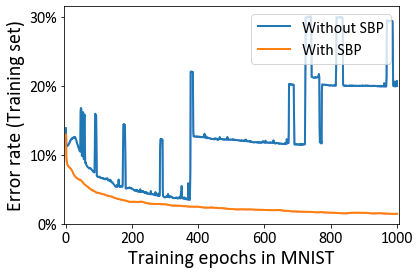

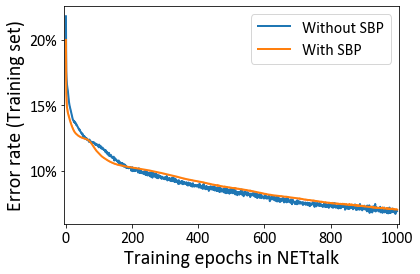

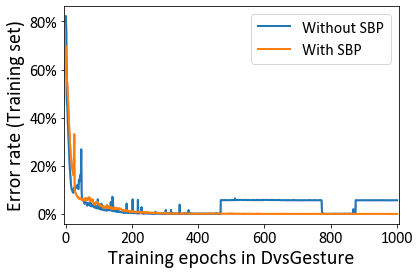

In [137]:

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_mnist_symmetricSTDP.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std(0))
cal_copy = np.zeros((5, 100))
cal_copy = np.array(error_list).copy()
for j in range(5):
    for i in range(len(np.where(cal_std>=0.027)[0])):
        a = (cal_copy[j,np.where(cal_std>=0.027)[0][i]-5:np.where(cal_std>=0.027)[0][i]].sum()/5).copy()
        cal_copy[j,np.where(cal_std>=0.027)[0][i]] = a.copy()
cal_mean    = cal_copy.mean(0)
cal_std = cal_copy.std(0)
cal_std[np.where(cal_std>0.1)] = 0.1
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list =[]
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_mnist_SP.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=True)
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max())
plt.xlim([-5, 1005])
# fig.savefig('Figure/SBP_train_MNIST_1000.svg')

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_nettalk_symmetricSTDP.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_nettalk_SP.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=True)
plt.xlabel('Training epochs in NETtalk',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max(), 0.2)
plt.xlim([-5, 1005])
# fig.savefig('Figure/SBP_train_NETTalk_1000.svg')

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_guesture_symmetricSTDP.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_guesture_SP.txt','train'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
cal_std[np.where(cal_std>0.1)] = 0.1
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=True)
plt.xlabel('Training epochs in DvsGesture',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max(), 0.2)
plt.xlim([-5, 1005])
# fig.savefig('Figure/SBP_train_DVSGesture_1000.svg')

## test

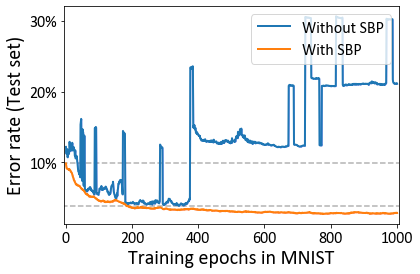

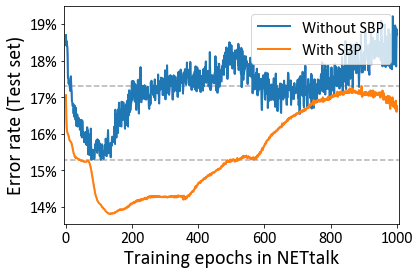

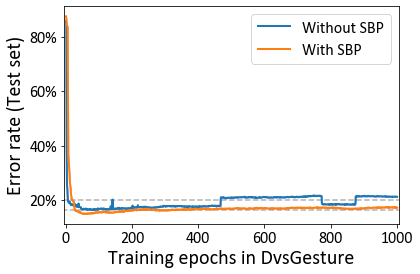

In [138]:
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_mnist_symmetricSTDP.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std(0))
cal_copy = np.zeros((5, 100))
cal_copy = np.array(error_list).copy()
for j in range(5):
    for i in range(len(np.where(cal_std>=0.027)[0])):
        a = (cal_copy[j,np.where(cal_std>=0.027)[0][i]-5:np.where(cal_std>=0.027)[0][i]].sum()/5).copy()
        cal_copy[j,np.where(cal_std>=0.027)[0][i]] = a.copy()
cal_mean    = cal_copy.mean(0)
cal_std = cal_copy.std(0)
cal_std[np.where(cal_std>0.1)] = 0.1
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list =[]
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_mnist_SP.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=True)
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max())
plt.xlim([-5, 1005])
plt.hlines(max_, -10, 1110, color='k',linestyle='--',alpha=.3)
plt.hlines(min_, -10, 1110, color='k',linestyle='--',alpha=.3)
# fig.savefig('Figure/SBP_test_MNIST_1000.svg')

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_nettalk_symmetricSTDP.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_nettalk_SP.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=True)
plt.xlabel('Training epochs in NETtalk',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max(), 0.2)
plt.xlim([-5, 1005])
plt.hlines(max_, -10, 1110, color='k',linestyle='--',alpha=.3)
plt.hlines(min_, -10, 1110, color='k',linestyle='--',alpha=.3)
# fig.savefig('Figure/SBP_test_NETTalk_1000.svg')

fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_guesture_symmetricSTDP.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std(0))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='Without SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_guesture_SP.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
cal_std[np.where(cal_std>0.1)] = 0.1
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='With SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.legend(loc='upper right',frameon=True)
plt.xlabel('Training epochs in DvsGesture',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max(), 0.2)
plt.xlim([-5, 1005])
plt.hlines(max_, -10, 1110, color='k',linestyle='--',alpha=.3)
plt.hlines(min_, -10, 1110, color='k',linestyle='--',alpha=.3)
# fig.savefig('Figure/SBP_test_DVSGesture_1000.svg')

## energy plot

      Without SBP    With SBP
mean   49369500.0  24486000.0
std           0.0         0.0


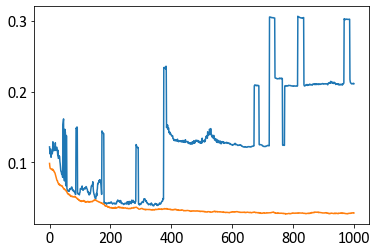

      Without SBP   With SBP
mean    4903200.0  1404000.0
std           0.0        0.0


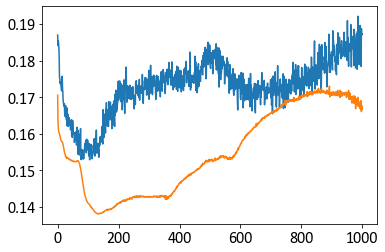

      Without SBP    With SBP
mean   16886800.0  13157200.0
std           0.0         0.0


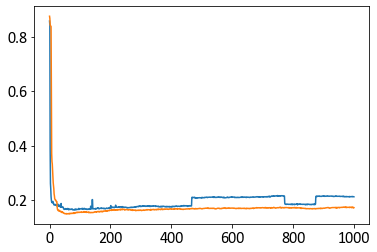

In [90]:
ENERGY_MEAN = np.zeros((3, 2))
ENERGY_STD = np.zeros((3, 2))
ACCURACY_BEST = np.zeros((3, 2))
ACCURACY_STD = np.zeros((3, 2))
# MNIST
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_mnist_symmetricSTDP.txt','test'))
cal    = np.array(error_list)
plt.plot(cal.mean(0))
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_mnist_SP.txt','test'))
cal_sbp    = np.array(error_list)
plt.plot(cal_sbp.mean(0))
no_sbp_list = []
with_sbp_list = []
l = min(cal.shape[0], cal_sbp.shape[0])
for index in range(l):
    min_ = max(cal[index,:].min(), cal_sbp[index,:].min())
    max_ = min(cal[index,:].max(), cal_sbp[index,:].max())
    x = np.linspace(min_, max_, 5)
    no_sbp_list_sub = []
    with_sbp_list_sub = []
    for i in range(len(x)):
        no_sbp = np.where(cal[index,:] <= x[i])[0][0]     # epoch - 1
        with_sbp = np.where(cal_sbp[index,:] <= x[i])[0][0]  # epoch - 1
        no_sbp_list_sub.append(no_sbp+1)
        with_sbp_list_sub.append(with_sbp+1)
    no_sbp_list.append(no_sbp_list_sub)
    with_sbp_list.append(with_sbp_list_sub)
no_sbp_list = np.array(no_sbp_list)*cost['SNN-SBP_MNIST']
with_sbp_list = np.array(with_sbp_list)*cost['SNN-SBP_MNIST']
energy_no_sbp = no_sbp_list.mean(1)
energy_with_sbp = with_sbp_list.mean(1)
df = pd.DataFrame({'Without SBP':[energy_no_sbp.mean(0), energy_no_sbp.std(0)], 'With SBP':[energy_with_sbp.mean(0), energy_with_sbp.std(0)]}, index=['mean', 'std'])
ENERGY_MEAN[0] = [energy_no_sbp.mean(0), energy_with_sbp.mean(0)]
ENERGY_STD[0] = [energy_no_sbp.std(0), energy_with_sbp.std(0)]
ACCURACY_BEST[0] = [1-cal.mean(0).min(), 1-cal_sbp.mean(0).min()]
ACCURACY_STD[0] = [cal.std(0)[np.where(cal.mean(0) == cal.mean(0).min())[0][0]], cal_sbp.std(0)
                   [np.where(cal_sbp.mean(0) == cal_sbp.mean(0).min())[0][0]]]
print(df)
plt.show()

# NETtalk
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_nettalk_symmetricSTDP.txt','test'))
cal    = np.array(error_list)
plt.plot(cal.mean(0))
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_nettalk_SP.txt','test'))
cal_sbp    = np.array(error_list)
plt.plot(cal_sbp.mean(0))
no_sbp_list = []
with_sbp_list = []
l = min(cal.shape[0], cal_sbp.shape[0])
for index in range(l):
    min_ = max(cal[index,:].min(), cal_sbp[index,:].min())
    max_ = min(cal[index,:].max(), cal_sbp[index,:].max())
    x = np.linspace(min_, max_, 5)
    no_sbp_list_sub = []
    with_sbp_list_sub = []
    for i in range(len(x)):
        no_sbp = np.where(cal[index,:] <= x[i])[0][0]     # epoch - 1
        with_sbp = np.where(cal_sbp[index,:] <= x[i])[0][0]  # epoch - 1
        no_sbp_list_sub.append(no_sbp+1)
        with_sbp_list_sub.append(with_sbp+1)
    no_sbp_list.append(no_sbp_list_sub)
    with_sbp_list.append(with_sbp_list_sub)
no_sbp_list = np.array(no_sbp_list)*cost['SNN-SBP_NETTalk']
with_sbp_list = np.array(with_sbp_list)*cost['SNN-SBP_NETTalk']
energy_no_sbp = no_sbp_list.mean(1)
energy_with_sbp = with_sbp_list.mean(1)
df = pd.DataFrame({'Without SBP':[energy_no_sbp.mean(0), energy_no_sbp.std(0)], 'With SBP':[energy_with_sbp.mean(0), energy_with_sbp.std(0)]}, index=['mean', 'std'])
print(df)
ENERGY_MEAN[1] = [energy_no_sbp.mean(0), energy_with_sbp.mean(0)]
ENERGY_STD[1] = [energy_no_sbp.std(0), energy_with_sbp.std(0)]
ACCURACY_BEST[1] = [1-cal.mean(0).min(), 1-cal_sbp.mean(0).min()]
ACCURACY_STD[1] = [cal.std(0)[np.where(cal.mean(0) == cal.mean(0).min())[0][0]], cal_sbp.std(0)
                   [np.where(cal_sbp.mean(0) == cal_sbp.mean(0).min())[0][0]]]
plt.show()

# DvsGesture
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_guesture_symmetricSTDP.txt','test'))
cal    = np.array(error_list)
plt.plot(cal.mean(0))
error_list = []
error_list.append(extract_txt1000('data/fig2aei/log/1000/','log_20210508T144602_guesture_SP.txt','test'))
cal_sbp    = np.array(error_list)
plt.plot(cal_sbp.mean(0))
no_sbp_list = []
with_sbp_list = []
l = min(cal.shape[0], cal_sbp.shape[0])
for index in range(l):
    min_ = max(cal[index,:].min(), cal_sbp[index,:].min())
    max_ = min(cal[index,:].max(), cal_sbp[index,:].max(), 0.2)
    x = np.linspace(min_, max_, 5)
    no_sbp_list_sub = []
    with_sbp_list_sub = []
    for i in range(len(x)):
        no_sbp = np.where(cal[index,:] <= x[i])[0][0]     # epoch - 1
        with_sbp = np.where(cal_sbp[index,:] <= x[i])[0][0]  # epoch - 1
        no_sbp_list_sub.append(no_sbp+1)
        with_sbp_list_sub.append(with_sbp+1)
    no_sbp_list.append(no_sbp_list_sub)
    with_sbp_list.append(with_sbp_list_sub)
no_sbp_list = np.array(no_sbp_list)*cost['SNN-SBP_DvsGesture']
with_sbp_list = np.array(with_sbp_list)*cost['SNN-SBP_DvsGesture']
energy_no_sbp = no_sbp_list.mean(1)
energy_with_sbp = with_sbp_list.mean(1)
df = pd.DataFrame({'Without SBP':[energy_no_sbp.mean(0), energy_no_sbp.std(0)], 'With SBP':[energy_with_sbp.mean(0), energy_with_sbp.std(0)]}, index=['mean', 'std'])
print(df)
ENERGY_MEAN[2] = [energy_no_sbp.mean(0), energy_with_sbp.mean(0)]
ENERGY_STD[2] = [energy_no_sbp.std(0), energy_with_sbp.std(0)]
ACCURACY_BEST[2] = [1-cal.mean(0).min(), 1-cal_sbp.mean(0).min()]
ACCURACY_STD[2] = [cal.std(0)[np.where(cal.mean(0) == cal.mean(0).min())[0][0]], cal_sbp.std(0)
                   [np.where(cal_sbp.mean(0) == cal_sbp.mean(0).min())[0][0]]]
plt.show()

# Compare to others

## Cost in each epoch

In [198]:
m,n,k,T = 784, 500, 10, 5
cost={}
cost['SNN-SBP_MNIST'] = m*n+n*k+n
cost['SNU_MNIST'] = m*n+n*k+k*n+n*m
cost['Eprop_MNIST'] = m*n+n*n+n*k+k*n+n*n+k*m
cost['NRRSNN_MNIST'] = m*n+n*n+n*k+k*n+n*n+k*m
cost['SHI_MNIST'] = m*n+n*k+k*n+n*m
cost['SOM_MNIST'] = m*n+n*k
cost['Dieh_MNIST'] = m*n+n*k
cost['BRP_MNIST'] = m*n+n*k+k*n+k*m
cost['MLP-SBP_MNIST'] = m*n+n*k+0.1*k*n+0.9*k*n+0.1*m*n+0.9*n
cost['BBT_MNIST'] = m*n+n*k+n+m
m,n,k,T = 189, 500, 26, 5
cost['SNN-SBP_NETTalk'] = m*n+n*k+n
cost['SNU_NETTalk'] = m*n+n*k+k*n+n*m
cost['Eprop_NETTalk'] = m*n+n*n+n*k+k*n+n*n+k*m
cost['NRRSNN_NETTalk'] = m*n+n*n+n*k+k*n+n*n+k*m
cost['SHI_NETTalk'] = m*n+n*k+k*n+n*m
cost['SOM_NETTalk'] = m*n+n*k
cost['Dieh_NETTalk'] = m*n+n*k
cost['BRP_NETTalk'] = m*n+n*k+k*n+k*m
cost['MLP-SBP_NETTalk'] = m*n+n*k+0.1*k*n+0.9*k*n+0.1*m*n+0.9*n
cost['BBT_NETTalk'] = m*n+n*k+n+m
m,n,k,T = 1024, 500, 11, 5
cost['SNN-SBP_Dvs'] = m*n+n*k+n
cost['SNU_Dvs'] = m*n+n*k+k*n+n*m
cost['Eprop_Dvs'] = m*n+n*n+n*k+k*n+n*n+k*m
cost['NRRSNN_Dvs'] = m*n+n*n+n*k+k*n+n*n+k*m
cost['SHI_Dvs'] = m*n+n*k+k*n+n*m
cost['SOM_Dvs'] = m*n+n*k
cost['Dieh_Dvs'] = m*n+n*k
cost['BRP_Dvs'] = m*n+n*k+k*n+k*m
cost['MLP-SBP_Dvs'] = m*n+n*k+0.1*k*n+0.9*k*n+0.1*m*n+0.9*n
cost['BBT_Dvs'] = m*n+n*k+n+m
print(str(cost).replace(',','\n'))

{'SNN-SBP_MNIST': 397500
 'SNU_MNIST': 794000
 'Eprop_MNIST': 909840
 'NRRSNN_MNIST': 909840
 'SHI_MNIST': 794000
 'SOM_MNIST': 397000
 'Dieh_MNIST': 397000
 'BRP_MNIST': 409840
 'MLP-SBP_MNIST': 441650.0
 'BBT_MNIST': 398284
 'SNN-SBP_NETTalk': 108000
 'SNU_NETTalk': 215000
 'Eprop_NETTalk': 625414
 'NRRSNN_NETTalk': 625414
 'SHI_NETTalk': 215000
 'SOM_NETTalk': 107500
 'Dieh_NETTalk': 107500
 'BRP_NETTalk': 125414
 'MLP-SBP_NETTalk': 130400.0
 'BBT_NETTalk': 108189
 'SNN-SBP_Dvs': 518000
 'SNU_Dvs': 1035000
 'Eprop_Dvs': 1034264
 'NRRSNN_Dvs': 1034264
 'SHI_Dvs': 1035000
 'SOM_Dvs': 517500
 'Dieh_Dvs': 517500
 'BRP_Dvs': 534264
 'MLP-SBP_Dvs': 574650.0
 'BBT_Dvs': 519024}


## MNIST

### line accuracy

Dieh(mean, std, index): 0.912 0.016944353369518446 [54]
SOM(mean, std, index): 0.9106666666666666 0.01793816539609827 [92]
BRP(mean, std, index): 0.9541999999999999 0.0012505998560690369 [60]
NRRSNN(mean, std, index): 0.9419400370121003 0.0011480063637135727 [93]
Eprop(mean, std, index): 0.9669080353975296 0.0008486779927907337 [15]
SNU(mean, std, index): 0.9873 0.0008294576541331032 [75]
SNN-SBP(mean, std, index): 0.95138 0.0012302845199383763 [99]
MLP-SBP(mean, std, index): 0.98648 0.00045343136195020984 [74]
BBT(mean, std, index): 0.93674 0.004029689814365366 [85]
min 0.05637996494770048 max 0.05709999999999993
min 0.0603 max 0.1049
             Diehl           SOM           BBT    SNN-SBP        SNU  \
mean  2.011996e+07  3.331624e+07  1.871935e+07  8792700.0  1588000.0   
std   2.784032e+06  1.531906e+06  2.643838e+06   413400.0        0.0   

               BRP      Eprop           NRR   MLP-SBP  
mean  5.688579e+06  3748540.8  8.923711e+07  512314.0  
std   4.293746e+05   218361

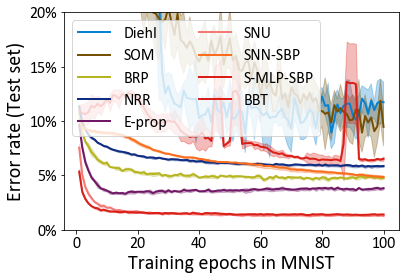

In [199]:
data_all = np.zeros((5, 100, 9))
acc = np.zeros((9, 2))
fig, ax = plt.subplots(1, 1)
colors = ['#0780cf', '#765005', '#fa6d1d', '#0e2c82', '#b6b51f', '#da1f18', '#701866', '#f47a75', '#009db2', '#024b51', '#0780cf', '#765005']

# Dieh
error_list = []
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','Dieh_20210510220054_MNIST_0.txt'))
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','Dieh_20210510220127_MNIST_42.txt'))
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','Dieh_20210510220141_MNIST_3.txt'))
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','Dieh_20210510220135_MNIST_512.txt'))
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','Dieh_20210510220148_MNIST_20.txt'))
data_all[:,:,0]= np.array(error_list)
cal_mean    = data_all[:,:,0].mean(0)
cal_std = (data_all[:,:,0].std(0))
print('Dieh(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[0,0] = 1-cal_mean.min()
acc[0,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[0],label='Diehl')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color=colors[0], alpha=.3)

# SOM
error_list = []
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','SOM_20210510222513_MNIST_0.txt'))
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','SOM_20210510222603_MNIST_42.txt'))
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','SOM_20210511175155_MNIST_3.txt'))
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','SOM_20210510222610_MNIST_512.txt'))
error_list.append(extract_txt_Dieh_SOM('data/compare_with_others/','SOM_20210510222656_MNIST_20.txt'))
data_all[:,:,1] = np.array(error_list)
cal_mean    = data_all[:,:,1].mean(0)
cal_std = (data_all[:,:,1].std(0))
print('SOM(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[1,0] = 1-cal_mean.min()
acc[1,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[1],label='SOM')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[1], alpha=.3)

# BRP
error_list = []
error_list.append(extract_txt_NRR('data/compare_with_others/','BRP_MNIST/brp_MNIST_seed_0/brp_MNIST_seed_0/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','BRP_MNIST/brp_MNIST_seed_42/brp_MNIST_seed_42/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','BRP_MNIST/brp_MNIST_seed_512/brp_MNIST_seed_512/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','BRP_MNIST/brp_MNIST_seed_3/brp_MNIST_seed_3/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','BRP_MNIST/brp_MNIST_seed_42/brp_MNIST_seed_42/testacc.txt'))
data_all[:,:,2] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('BRP(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[2,0] = 1-cal_mean.min()
acc[2,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[4],label='BRP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[4], alpha=.3)

# NRRSNN
error_list = []
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_MNIST/NRR_MNIST_seed_0/NRR_MNIST_seed_0-0/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_MNIST/NRR_MNIST_seed_3/NRR_MNIST_seed_3-3/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_MNIST/NRR_MNIST_seed_42/NRR_MNIST_seed_42-42/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_MNIST/NRR_MNIST_seed_512/NRR_MNIST_seed_512-512/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_MNIST/NRR_MNIST_seed_20/NRR_MNIST_seed_20-20/testacc.txt'))
data_all[:,:,3] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('NRRSNN(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[3,0] = 1-cal_mean.min()
acc[3,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='NRR',color=colors[3])
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color=colors[3], alpha=.3)

# Eprop
error_list = []
error_list.append(extract_txt_NRR('data/compare_with_others/','eprop_MNIST/eprop_MNIST_seed_0/eprop_MNIST_seed_0-0/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','eprop_MNIST/eprop_MNIST_seed_3/eprop_MNIST_seed_3-3/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','eprop_MNIST/eprop_MNIST_seed_42/eprop_MNIST_seed_42-42/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','eprop_MNIST/eprop_MNIST_seed_512/eprop_MNIST_seed_512-512/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','eprop_MNIST/eprop_MNIST_seed_20/eprop_MNIST_seed_20-20/testacc.txt'))
data_all[:,:,4] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('Eprop(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[4,0] = 1-cal_mean.min()
acc[4,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[6],label='E-prop')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[6], alpha=.3)

# SNU
error_list = []
error_list.append(extract_txt_snu('data/compare_with_others/snu_mnist','nohup_90_MNIST_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_mnist','nohup_1234_MNIST_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_mnist','nohup_3154_MNIST_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_mnist','nohup_5678_MNIST_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_mnist','nohup_6666_MNIST_snu'))
data_all[:,:,5] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('SNU(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[5,0] = 1-cal_mean.min()
acc[5,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[7],label='SNU')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[7], alpha=.3)

#SNN-SBP(No-Grad)
error_list =[]
error_list.append(extract('data/fig2aei/log/log_20200429T145537_mnist_SP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_mnist_SP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_mnist_SP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_mnist_SP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_mnist_SP_512.txt','test'))
data_all[:,:,6] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('SNN-SBP(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[6,0] = 1-cal_mean.min()
acc[6,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[2],label='SNN-SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[2], alpha=.3)

# S-MLP-SBP(Grad)
error_list = []
error_list.append(extract_txt_snu('data/pBP_data2','nohup_90_MNIST_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_1234_MNIST_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_3154_MNIST_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_5678_MNIST_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_6666_MNIST_BP0.1_l3'))
data_all[:,:,7] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('MLP-SBP(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[7,0] = 1-cal_mean.min()
acc[7,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[5],label='S-MLP-SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[5], alpha=.3)

# BBT
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145537_mnist_symmetricSTDP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_mnist_symmetricSTDP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_mnist_symmetricSTDP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_mnist_symmetricSTDP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_mnist_symmetricSTDP_512.txt','test'))
data_all[:,:,8] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('BBT(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[8,0] = 1-cal_mean.min()
acc[8,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[5],label='BBT')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[5], alpha=.3)

dfacc = pd.DataFrame({'Dieh':[acc[0,0] , acc[0,1]],
            'SOM':[acc[1,0] , acc[1,1]],
            'BBT':[acc[8,0] , acc[8,1]],
            'SNN-SBP':[acc[6,0] , acc[6,1]],
            'SNU':[acc[5,0] , acc[5,1]],
            'BRP':[acc[2,0] , acc[2,1]],
            'Eprop':[acc[4,0] , acc[4,1]],
            'NRR':[acc[3,0] , acc[3,1]],
            'MLP-SBP':[acc[7,0] , acc[7,1]]},
            index=['mean', 'std'])

ax.legend(loc='upper left',ncol=2)
plt.ylim([0, 0.2])
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

methods_list = {}
methods_list['Dieh'] = []
methods_list['SOM'] = []
methods_list['BRP'] = []
methods_list['NRR'] = []
methods_list['Eprop'] = []
methods_list['SNU'] = []
methods_list['SNN-SBP'] = []
methods_list['MLP-SBP'] = []
methods_list['BBT'] = []

min_ = max(
            data_all[:,:,2].min(), 
            data_all[:,:,3].min(),
            data_all[:,:,4].min(),
            data_all[:,:,5].min(),
            data_all[:,:,7].min()
)
max_ = min(
            data_all[:,:,2].max(), 
            data_all[:,:,3].max(),
            data_all[:,:,4].max(),
            data_all[:,:,5].max(),
            data_all[:,:,7].max(),0.2)
print('min',min_,'max',max_)
for index in range(5):
    x = np.linspace(min_, max_, 5)
    sub_methods_list = {}
    sub_methods_list['BRP'] = []
    sub_methods_list['NRR'] = []
    sub_methods_list['Eprop'] = []
    sub_methods_list['SNU'] = []
    sub_methods_list['MLP-SBP'] = []
    for i in range(len(x)):
        try: c = np.where(data_all[index,:,2] <= x[i])[0][0]  # epoch - 1
        except: c = 99
        try: d = np.where(data_all[index,:,3] <= x[i])[0][0]  # epoch - 1
        except: d=99
        try: e = np.where(data_all[index,:,4] <= x[i])[0][0]  # epoch - 1
        except: e = 99
        f = np.where(data_all[index,:,5] <= x[i])[0][0]  # epoch - 1
        h = np.where(data_all[index,:,7] <= x[i])[0][0]  # epoch - 1
        sub_methods_list['BRP'].append(c+1)
        sub_methods_list['NRR'].append(d+1)
        sub_methods_list['Eprop'].append(e+1)
        sub_methods_list['SNU'].append(f+1)
        sub_methods_list['MLP-SBP'].append(h+1)
    methods_list['BRP'].append(sub_methods_list['BRP'])
    methods_list['NRR'].append(sub_methods_list['NRR'])
    methods_list['Eprop'].append(sub_methods_list['Eprop'])
    methods_list['SNU'].append(sub_methods_list['SNU'])
    methods_list['MLP-SBP'].append(sub_methods_list['MLP-SBP'])
methods_list['BRP'] = np.array(methods_list['BRP'])
methods_list['NRR'] = np.array(methods_list['NRR'])
methods_list['Eprop'] = np.array(methods_list['Eprop'])
methods_list['SNU'] = np.array(methods_list['SNU'])
methods_list['MLP-SBP'] = np.array(methods_list['MLP-SBP'])

df = pd.DataFrame({
            'SNU':[methods_list['SNU'].mean(1).mean(0)*cost['SNU_MNIST'], 
                     methods_list['SNU'].mean(1).std(0)*cost['SNU_MNIST']],
            'BRP':[methods_list['BRP'].mean(1).mean(0)*cost['BRP_MNIST'], 
                   methods_list['BRP'].mean(1).std(0)*cost['BRP_MNIST']],
            'Eprop':[methods_list['Eprop'].mean(1).mean(0)*cost['Eprop_MNIST'], 
                     methods_list['Eprop'].mean(1).std(0)*cost['Eprop_MNIST']],
            'NRR':[methods_list['NRR'].mean(1).mean(0)*cost['NRRSNN_MNIST'],
                          methods_list['NRR'].mean(1).std(0)*cost['NRRSNN_MNIST']], 
            'MLP-SBP':[methods_list['MLP-SBP'].mean(1).mean(0)*cost['MLP-SBP_MNIST'],
                   methods_list['MLP-SBP'].mean(1).std(0)*cost['MLP-SBP_MNIST']]},
            index=['mean', 'std'])
#-----------------------------------------------
min_ = max(data_all[:,:,0].min(), 
            data_all[:,:,1].min(),
            data_all[:,:,6].min(),
            data_all[:,:,8].min())
max_ = min(data_all[:,:,0].max(), 
            data_all[:,:,1].max(), 
            data_all[:,:,6].max(),
            data_all[:,:,8].max(),0.2)
print('min',min_,'max',max_)   
for index in range(5):
    x = np.linspace(min_, max_, 5)
    sub_methods_list = {}
    sub_methods_list['Dieh'] = []
    sub_methods_list['SOM'] = []
    sub_methods_list['SNN-SBP'] = []
    sub_methods_list['BBT'] = []
    for i in range(len(x)):
        try: a = np.where(data_all[index,:,0] <= x[i])[0][0]     # epoch - 1
        except: a = 99
        try: b = np.where(data_all[index,:,1] <= x[i])[0][0]  # epoch - 1
        except: b = 99
        g = np.where(data_all[index,:,6] <= x[i])[0][0]  # epoch - 1
        try:i = np.where(data_all[index,:,8] <= x[i])[0][0]  # epoch - 1
        except: i = 99
        sub_methods_list['Dieh'].append(a+1)
        sub_methods_list['SOM'].append(b+1)
        sub_methods_list['SNN-SBP'].append(g+1)
        sub_methods_list['BBT'].append(i+1)
    methods_list['Dieh'].append(sub_methods_list['Dieh'])
    methods_list['SOM'].append(sub_methods_list['SOM'])
    methods_list['SNN-SBP'].append(sub_methods_list['SNN-SBP'])
    methods_list['BBT'].append(sub_methods_list['BBT'])
methods_list['Dieh'] = np.array(methods_list['Dieh'])
methods_list['SOM'] = np.array(methods_list['SOM'])
methods_list['SNN-SBP'] = np.array(methods_list['SNN-SBP'])
methods_list['BBT'] = np.array(methods_list['BBT'])

df.insert(0,'Diehl',[methods_list['Dieh'].mean(1).mean(0)*cost['Dieh_MNIST'], 
                    methods_list['Dieh'].mean(1).std(0)*cost['Dieh_MNIST']])
df.insert(1,'SOM',[methods_list['SOM'].mean(1).mean(0)*cost['SOM_MNIST'], 
                   methods_list['SOM'].mean(1).std(0)*cost['SOM_MNIST']])
df.insert(2,'BBT',[methods_list['BBT'].mean(1).mean(0)*cost['BBT_MNIST'],
                   methods_list['BBT'].mean(1).std(0)*cost['BBT_MNIST']])
df.insert(3,'SNN-SBP',[methods_list['SNN-SBP'].mean(1).mean(0)*cost['SNN-SBP_MNIST'],
                   methods_list['SNN-SBP'].mean(1).std(0)*cost['SNN-SBP_MNIST']])
print(df)

### Acc bar

          Dieh       SOM      BBT  SNN-SBP       SNU       BRP     Eprop  \
mean  0.912000  0.910667  0.93674  0.95138  0.987300  0.954200  0.966908   
std   0.016944  0.017938  0.00403  0.00123  0.000829  0.001251  0.000849   

           NRR   MLP-SBP  
mean  0.941940  0.986480  
std   0.001148  0.000453  


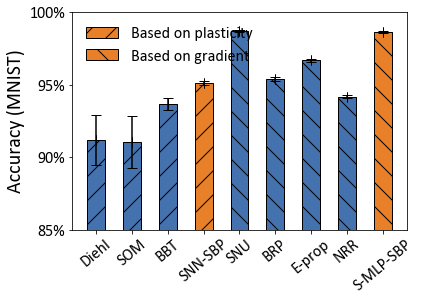

In [307]:
fig, ax = plt.subplots(1, 1)
print(dfacc)
values = dfacc.iloc[0,:]
methods = np.array(['Diehl','SOM','BBT','SNN-SBP','SNU','BRP','E-prop','NRR', 'S-MLP-SBP'])
vars = dfacc.iloc[1,:]
mybar(ax,3,8,1)
plt.errorbar(np.arange(len(vars)),values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
plt.ylim((0.85, 1.0))
plt.ylabel('Accuracy (MNIST)',fontsize=20)
plt.xticks(range(len(methods)),methods,rotation=40)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# plt.savefig('Figure/MNIST_acc.eps',bbox_inches = 'tight')
plt.show()

### cost bar

             Diehl           SOM           BBT    SNN-SBP        SNU  \
mean  2.011996e+07  3.331624e+07  1.871935e+07  8792700.0  1588000.0   
std   2.784032e+06  1.531906e+06  2.643838e+06   413400.0        0.0   

               BRP      Eprop           NRR   MLP-SBP  
mean  5.688579e+06  3748540.8  8.923711e+07  512314.0  
std   4.293746e+05   218361.6  2.822792e+06  141328.0  
MIN
Diehl      1.532393
SOM        2.845271
BBT        1.420358
SNN-SBP    0.750003
SNU        0.142920
BRP        0.469035
Eprop      0.315533
NRR        7.749060
MLP-SBP    0.031975
dtype: float64
MAX
Diehl       2.491599
SOM         3.817977
BBT         2.323512
SNN-SBP     1.008537
SNU         0.174680
BRP         0.668681
Eprop       0.434176
NRR        10.098361
MLP-SBP     0.070487
dtype: float64


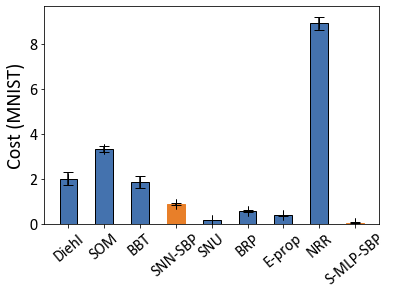

In [141]:
fig, ax = plt.subplots(1, 1)
print(df)
values = df.iloc[0,:]/1e7
methods = np.array(['Diehl','SOM','BBT','SNN-SBP','SNU','BRP','E-prop','NRR', 'S-MLP-SBP'])
vars = df.iloc[1,:]/1e7
barfigure = plt.bar(range(len(values)),values, width=.5,tick_label=methods, facecolor='#4472AE',edgecolor='black')
plt.errorbar(np.arange(len(vars)),values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
barfigure[3].set_color('#E87F29')
barfigure[8].set_color('#E87F29')
plt.ylabel('Cost (MNIST)',fontsize=20)
plt.xticks(rotation=40)
min__ = df.iloc[0,:]/1e7 - df.iloc[1,:]/1e7 - df.iloc[0,:]/1e7 * 0.1
max__ = df.iloc[0,:]/1e7 + df.iloc[1,:]/1e7 + df.iloc[0,:]/1e7 * 0.1
print('MIN')
print(min__)
print('MAX')
print(max__)

         Diehl       SOM       BBT  SNN-SBP     SNU       BRP     Eprop  \
mean  2.011996  3.331624  1.871935  0.87927  0.1588  0.568858  0.374854   
std   0.278403  0.153191  0.264384  0.04134  0.0000  0.042937  0.021836   

           NRR   MLP-SBP  
mean  8.923711  0.051231  
std   0.282279  0.014133  


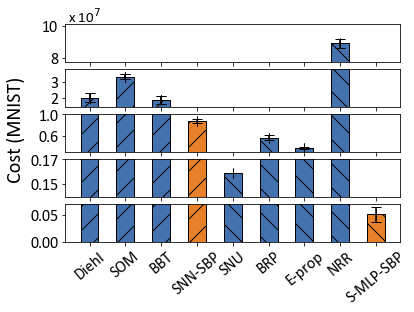

In [311]:

fig, (ax, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True)
print(df/1e7)
values = df.iloc[0,:]/1e7
methods = np.array(['Diehl','SOM','BBT','SNN-SBP','SNU','BRP','E-prop','NRR', 'S-MLP-SBP'])
vars = df.iloc[1,:]/1e7
mybar(ax,3,8)
mybar(ax2,3,8)
mybar(ax3,3,8)
mybar(ax4,3,8)
mybar(ax5,3,8)

ax.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax2.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax3.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax2.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax4.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax5.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax5.set_ylim(0, 0.07)  # outliers only
ax4.set_ylim(0.14, 0.17)  # outliers only
ax3.set_ylim(0.3, 1)  # outliers only
ax2.set_ylim(1.42, 3.8)  # outliers only
ax.set_ylim(7.74, 10.1)  # outliers only
ax2.set_yticks([2,3])
ax3.set_yticks([0.6,1])
ax4.set_yticks([0.15,0.17])

ax5.set_ylabel('Cost (MNIST)',fontsize=20)
ax5.yaxis.set_label_coords(-0.12,3)
plt.xticks(range(len(methods)),methods,rotation=40)
plt.text(-0.6, 0.41, 'x 10$^{7}$',fontsize=15)
# fig.savefig('fig2n_MNIST_test.eps',bbox_inches = 'tight')

## NETtalk

### line accuracy

BRP(mean, std, index): 0.8032978 0.04518414974922068 [93]
NRRSNN(mean, std, index): 0.777335 0.004561289159875746 [97]
Eprop(mean, std, index): 0.8153163999999999 0.017292301438501457 [47]
SNU(mean, std, index): 0.8878199999999999 0.003200874880403763 [22]
SNN-SBP(mean, std, index): 0.855837 0.0010786901315947858 [99]
MLP-SBP(mean, std, index): 0.90268 0.006674548673880494 [81]
BBT(mean, std, index): 0.8426198 0.0019999325388622455 [75]
min 0.21469499999999997 max 0.17409999999999992
min 0.151205 max 0.171865
               BBT       SNN-SBP       SNU           BRP         Eprop  \
mean  5.764310e+06  2.039040e+06  215000.0  7.605105e+06  2.894416e+07   
std   5.855174e+05  2.110177e+05       0.0  3.402300e+06  3.915391e+06   

              NRR        MLP-SBP  
mean  62191168.16  151264.000000  
std     700463.68   19516.484929  


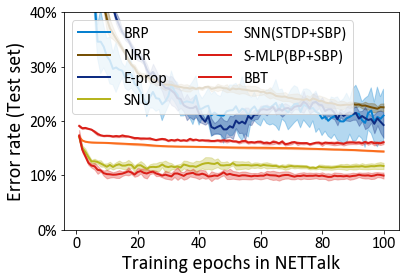

In [312]:
data_all = np.zeros((5, 100, 8))
acc = np.zeros((8,2))
colors = ['#0780cf', '#765005', '#fa6d1d', '#0e2c82', '#b6b51f', '#da1f18', '#701866', '#f47a75', '#009db2', '#024b51', '#0780cf', '#765005']
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)

# BRP
error_list = []
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_nettalk/brp_nettalk_seed/brp_nettalk_seed-0/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_nettalk/brp_nettalk_seed/brp_nettalk_seed-42/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_nettalk/brp_nettalk_seed/brp_nettalk_seed-512/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_nettalk/brp_nettalk_seed/brp_nettalk_seed-3/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_nettalk/brp_nettalk_seed/brp_nettalk_seed-20/testacc.txt'))
data_all[:,:,0] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('BRP(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[0,0] = 1-cal_mean.min()
acc[0,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[0],label='BRP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[0], alpha=.3)

# NRRSNN
error_list = []
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_NETTalk/NRR_nettalk_seed/NRR_nettalk_seed-0-0/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_NETTalk/NRR_nettalk_seed/NRR_nettalk_seed-3-3/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_NETTalk/NRR_nettalk_seed/NRR_nettalk_seed-42-42/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_NETTalk/NRR_nettalk_seed/NRR_nettalk_seed-512-512/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_NETTalk/NRR_nettalk_seed/NRR_nettalk_seed-3-3/testacc.txt'))
data_all[:,:,1] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('NRRSNN(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[1,0] = 1-cal_mean.min()
acc[1,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='NRR',color=colors[1])
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color=colors[1], alpha=.3)

# Eprop
error_list = []
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_nettalk_seed/erop_nettalk_seed-0-0/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_nettalk_seed/erop_nettalk_seed-42-42/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_nettalk_seed/erop_nettalk_seed-512-512/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_nettalk_seed/erop_nettalk_seed-3-3/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_nettalk_seed/erop_nettalk_seed-42-42/testacc.txt'))
data_all[:,:,2] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('Eprop(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[2,0] = 1-cal_mean.min()
acc[2,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[3],label='E-prop')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[3], alpha=.3)

# SNU
error_list = []
error_list.append(extract_txt_snu('data/compare_with_others/snu_nettalk','nohup_90_NETTalk_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_nettalk','nohup_1234_NETTalk_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_nettalk','nohup_3154_NETTalk_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_nettalk','nohup_5678_NETTalk_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_nettalk','nohup_6666_NETTalk_snu'))
data_all[:,:,3] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('SNU(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[3,0] = 1-cal_mean.min()
acc[3,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[4],label='SNU')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[4], alpha=.3)

#SNN-SBP
error_list =[]
error_list.append(extract('data/fig2aei/log/log_20200429T145538_nettalk_SP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_nettalk_SP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_nettalk_SP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_nettalk_SP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_nettalk_SP_512.txt','test'))
data_all[:,:,5] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('SNN-SBP(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[5,0] = 1-cal_mean.min()
acc[5,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[2],label='SNN(STDP+SBP)')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[2], alpha=.3)

# MLP-SBP(Grad)
error_list = []
error_list.append(extract_txt_snu('data/pBP_data2','nohup_90_NETTalk_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_1234_NETTalk_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_3154_NETTalk_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_5678_NETTalk_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_6666_NETTalk_BP0.1_l3'))
data_all[:,:,6] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('MLP-SBP(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[6,0] = 1-cal_mean.min()
acc[6,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[5],label='S-MLP(BP+SBP)')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[5], alpha=.3)

# BBT
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_nettalk_symmetricSTDP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_nettalk_symmetricSTDP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114757_nettalk_symmetricSTDP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_nettalk_symmetricSTDP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_nettalk_symmetricSTDP_512.txt','test'))
data_all[:,:,7] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('BBT(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[7,0] = 1-cal_mean.min()
acc[7,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[5],label='BBT')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[5], alpha=.3)

dfacc = pd.DataFrame({
            'BBT':[acc[7,0] , acc[7,1]],
            'SNN-SBP':[acc[5,0] , acc[5,1]],
            'SNU':[acc[3,0] , acc[3,1]],
            'BRP':[acc[0,0] , acc[0,1]],
            'Eprop':[acc[2,0] , acc[2,1]],
            'NRR':[acc[1,0] , acc[1,1]],
            'MLP-SBP':[acc[6,0] , acc[6,1]]},
            index=['mean', 'std'])

ax.legend(loc='upper left',ncol=2)
plt.ylim([0, 0.4])
plt.xlabel('Training epochs in NETTalk',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

# calculate the energy
methods_list = {}
methods_list['BRP'] = []
methods_list['NRR'] = []
methods_list['Eprop'] = []
methods_list['SNU'] = []
methods_list['SNN-SBP'] = []
methods_list['MLP-SBP'] = []
methods_list['BBT'] = []

min_ = max(data_all[:,:,0].min(), 
        data_all[:,:,1].min(),
        data_all[:,:,2].min(),
        data_all[:,:,3].min(),
        data_all[:,:,6].min())
max_ = min(data_all[:,:,0].max(), 
        data_all[:,:,1].max(), 
        data_all[:,:,2].max(), 
        data_all[:,:,3].max(), 
        data_all[:,:,6].max(),0.4)
print('min',min_,'max',max_)
for index in range(5):
    x = np.linspace(min_, max_, 5)
    sub_methods_list = {}
    sub_methods_list['BRP'] = []
    sub_methods_list['NRR'] = []
    sub_methods_list['Eprop'] = []
    sub_methods_list['SNU'] = []
    sub_methods_list['MLP-SBP'] = []
    for i in range(len(x)):
        try: a = np.where(data_all[index,:,0] <= x[i])[0][0]     # epoch - 1
        except: a = 99
        try: b = np.where(data_all[index,:,1] <= x[i])[0][0]  # epoch - 1
        except: b = 99
        try: c = np.where(data_all[index,:,2] <= x[i])[0][0]  # epoch - 1
        except: c = 99
        try: d = np.where(data_all[index,:,3] <= x[i])[0][0]  # epoch - 1
        except: d=99
        try: g = np.where(data_all[index,:,6] <= x[i])[0][0]  # epoch - 1
        except: g=99
        sub_methods_list['BRP'].append(a+1)
        sub_methods_list['NRR'].append(b+1)
        sub_methods_list['Eprop'].append(c+1)
        sub_methods_list['SNU'].append(d+1)
        sub_methods_list['MLP-SBP'].append(g+1)
    methods_list['BRP'].append(sub_methods_list['BRP'])
    methods_list['NRR'].append(sub_methods_list['NRR'])
    methods_list['Eprop'].append(sub_methods_list['Eprop'])
    methods_list['SNU'].append(sub_methods_list['SNU'])
    methods_list['MLP-SBP'].append(sub_methods_list['MLP-SBP'])
methods_list['BRP'] = np.array(methods_list['BRP'])
methods_list['NRR'] = np.array(methods_list['NRR'])
methods_list['Eprop'] = np.array(methods_list['Eprop'])
methods_list['SNU'] = np.array(methods_list['SNU'])
methods_list['MLP-SBP'] = np.array(methods_list['MLP-SBP'])
df = pd.DataFrame({
            'SNU':[methods_list['SNU'].mean(1).mean(0)*cost['SNU_NETTalk'], 
                     methods_list['SNU'].mean(1).std(0)*cost['SNU_NETTalk']],
            'BRP':[methods_list['BRP'].mean(1).mean(0)*cost['BRP_NETTalk'], 
                   methods_list['BRP'].mean(1).std(0)*cost['BRP_NETTalk']],
            'Eprop':[methods_list['Eprop'].mean(1).mean(0)*cost['Eprop_NETTalk'], 
                     methods_list['Eprop'].mean(1).std(0)*cost['Eprop_NETTalk']],
            'NRR':[methods_list['NRR'].mean(1).mean(0)*cost['NRRSNN_NETTalk'],
                          methods_list['NRR'].mean(1).std(0)*cost['NRRSNN_NETTalk']], 
            'MLP-SBP':[methods_list['MLP-SBP'].mean(1).mean(0)*cost['MLP-SBP_NETTalk'], 
                   methods_list['MLP-SBP'].mean(1).std(0)*cost['MLP-SBP_NETTalk']]}, index=['mean', 'std'])

#----------------------------------------------------------
min_ = max(
        data_all[:,:,5].min(),
        data_all[:,:,7].min())
max_ = min(
        data_all[:,:,5].max(), 
        data_all[:,:,7].max())
print('min',min_,'max',max_)
for index in range(5):
    x = np.linspace(min_, max_, 5)
    sub_methods_list = {}
    sub_methods_list['SNN-SBP'] = []
    sub_methods_list['BBT'] = []
    for i in range(len(x)):
        f = np.where(data_all[index,:,5] <= x[i])[0][0]  # epoch - 1
        try: h = np.where(data_all[index,:,7] <= x[i])[0][0]  # epoch - 1
        except: h=99
        sub_methods_list['SNN-SBP'].append(f+1)
        sub_methods_list['BBT'].append(h+1)
    methods_list['SNN-SBP'].append(sub_methods_list['SNN-SBP'])
    methods_list['BBT'].append(sub_methods_list['BBT'])
methods_list['SNN-SBP'] = np.array(methods_list['SNN-SBP'])
methods_list['BBT'] = np.array(methods_list['BBT'])
df.insert(0,'BBT',[methods_list['BBT'].mean(1).mean(0)*cost['BBT_NETTalk'], 
                   methods_list['BBT'].mean(1).std(0)*cost['BBT_NETTalk']])
df.insert(1,'SNN-SBP',[methods_list['SNN-SBP'].mean(1).mean(0)*cost['SNN-SBP_NETTalk'], 
                     methods_list['SNN-SBP'].mean(1).std(0)*cost['SNN-SBP_NETTalk']])
print(df)

### bar

### Acc bar

          BBT   SNN-SBP       SNU       BRP     Eprop       NRR   MLP-SBP
mean  0.84262  0.855837  0.887820  0.803298  0.815316  0.777335  0.902680
std   0.00200  0.001079  0.003201  0.045184  0.017292  0.004561  0.006675


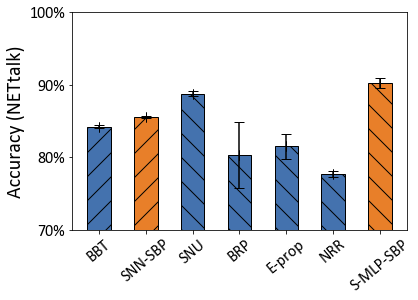

In [313]:
fig, ax = plt.subplots(1, 1)
print(dfacc)
values = dfacc.iloc[0,:]
methods = np.array(['BBT','SNN-SBP','SNU','BRP','E-prop','NRR', 'S-MLP-SBP'])
vars = dfacc.iloc[1,:]
mybar(ax,1,6)
plt.errorbar(np.arange(len(vars)),values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
plt.ylim((0.7, 1.0))
plt.ylabel('Accuracy (NETtalk)',fontsize=20)
plt.xticks(range(len(methods)),methods,rotation=40)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
fig.savefig('Figure/NETTalk_acc.eps',bbox_inches = 'tight')

### coat bar

               BBT       SNN-SBP       SNU           BRP         Eprop  \
mean  5.764310e+06  2.039040e+06  215000.0  7.605105e+06  2.894416e+07   
std   5.855174e+05  2.110177e+05       0.0  3.402300e+06  3.915391e+06   

              NRR        MLP-SBP  
mean  62191168.16  151264.000000  
std     700463.68   19516.484929  
	MIN
BBT        0.460236
SNN-SBP    0.162412
SNU        0.019350
BRP        0.344229
Eprop      2.213435
NRR        5.527159
MLP-SBP    0.011662
dtype: float64
	MAX
BBT        0.692626
SNN-SBP    0.245396
SNU        0.023650
BRP        1.176792
Eprop      3.575397
NRR        6.911075
MLP-SBP    0.018591
dtype: float64


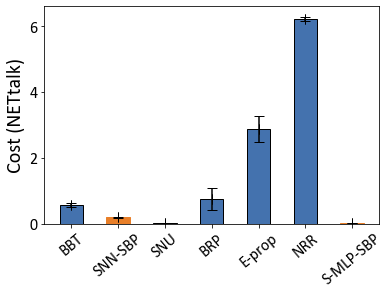

In [153]:

fig, ax = plt.subplots(1, 1)
print(df)
values = df.iloc[0,:]/1e7
methods = np.array(['BBT','SNN-SBP','SNU','BRP','E-prop','NRR', 'S-MLP-SBP'])
vars = df.iloc[1,:]/1e7
barfigure = plt.bar(range(len(values)),values, width=.5,tick_label=methods, facecolor='#4472AE',edgecolor='black')
plt.errorbar(np.arange(len(vars)),values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
barfigure[1].set_color('#E87F29')
barfigure[6].set_color('#E87F29')
plt.ylabel('Cost (NETtalk)',fontsize=20)
plt.xticks(rotation=40)

min__ = df.iloc[0,:]/1e7 - df.iloc[1,:]/1e7 - df.iloc[0,:]/1e7 * 0.1
max__ = df.iloc[0,:]/1e7 + df.iloc[1,:]/1e7 + df.iloc[0,:]/1e7 * 0.1
print('\tMIN')
print(min__)
print('\tMAX')
print(max__)

           BBT   SNN-SBP     SNU      BRP     Eprop       NRR   MLP-SBP
mean  0.576431  0.203904  0.0215  0.76051  2.894416  6.219117  0.015126
std   0.058552  0.021102  0.0000  0.34023  0.391539  0.070046  0.001952


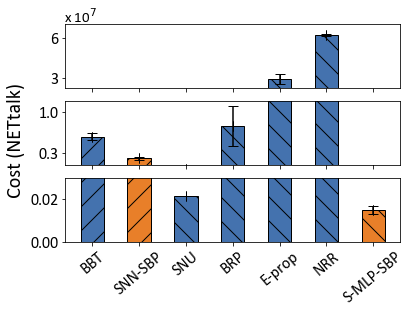

In [314]:
plt.rcParams.update({'font.size': 16})
fig, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True)
print(df/1e7)
values = df.iloc[0,:]/1e7
methods = np.array(['BBT','SNN-SBP','SNU','BRP','E-prop','NRR', 'S-MLP-SBP'])
vars = df.iloc[1,:]/1e7
mybar(ax,1,6)
mybar(ax2,1,6)
mybar(ax3,1,6)
ax.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax2.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax3.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax3.set_ylim(0, 0.03)  # outliers only
ax2.set_ylim(0.09, 1.18)  # outliers only
ax.set_ylim(2.2, 7)  # outliers only
ax.set_yticks([3,6])
ax2.set_yticks([0.3,1])
ax3.set_yticks([0,0.02])
ax3.set_ylabel('Cost (NETtalk)',fontsize=20)
ax3.yaxis.set_label_coords(-0.12,1.6)
plt.xticks(range(len(methods)),methods,rotation=40)
plt.text(-0.6, 0.103, 'x 10$^{7}$',fontsize=15)
fig.savefig('Figure/fig2n_NETTalk_test.eps',bbox_inches = 'tight')

## DvsGesture

### line accuracy

BRP(mean, std, index): 0.41874999999999996 0.033275412640863714 [41]
NRRSNN(mean, std, index): 0.6040000247955323 0.01669682218548784 [55]
Eprop(mean, std, index): 0.5836800265312194 0.009282754626369908 [31]
SNU(mean, std, index): 0.6972200000000001 0.011082129759211454 [92]
SHI(mean, std, index): 0.71874 0.009821731008330442 [96]
SNN-SBP(mean, std, index): 0.8503538 0.000929772746427853 [77]
MLP-SBP(mean, std, index): 0.66944 0.0067496962894637 [57]
BBT(mean, std, index): 0.8344028 0.0016071941264203323 [69]
min 0.4965277777777778 max 0.4
min 0.160833 max 0.2
               BBT    SNN-SBP           SNU           SHI          BRP  \
mean  1.588213e+07  9199680.0  3.684600e+06  2.856600e+06  53148582.72   
std   5.260763e+06   372960.0  6.056298e+05  4.420310e+05    555634.56   

             Eprop           NRR       MLP-SBP  
mean  3.450305e+07  2.051980e+07  1.563048e+06  
std   8.664540e+06  6.457519e+06  2.777409e+05  


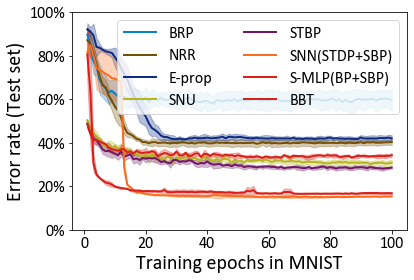

In [327]:
data_all = np.zeros((5, 100, 8))
acc = np.zeros((8,2))
# colors = ['#4f81bd','#c0504d','#9bbb59','#8064a2','#4bacc6']
colors = ['#0780cf', '#765005', '#fa6d1d', '#0e2c82', '#b6b51f', '#da1f18', '#701866', '#f47a75', '#009db2', '#024b51', '#0780cf', '#765005']
fig, ax = plt.subplots(1, 1)

# BRP
error_list = []
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_dvsgesture/brp_dvsgesture_seed/brp_dvsgesture_seed-0/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_dvsgesture/brp_dvsgesture_seed/brp_dvsgesture_seed-42/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_dvsgesture/brp_dvsgesture_seed/brp_dvsgesture_seed-512/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_dvsgesture/brp_dvsgesture_seed/brp_dvsgesture_seed-3/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','brp_dvsgesture/brp_dvsgesture_seed/brp_dvsgesture_seed-20/testacc.txt'))
data_all[:,:,0] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('BRP(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[0,0] = 1-cal_mean.min()
acc[0,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[0],label='BRP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[0], alpha=.3)

# NRRSNN
error_list = []
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_gesture/NRR_dvsgesture_seed/NRR_dvsgesture_seed-0-0/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_gesture/NRR_dvsgesture_seed/NRR_dvsgesture_seed-42-42/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_gesture/NRR_dvsgesture_seed/NRR_dvsgesture_seed-3-3/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_gesture/NRR_dvsgesture_seed/NRR_dvsgesture_seed-512-512/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','NRR_gesture/NRR_dvsgesture_seed/NRR_dvsgesture_seed-20-20/testacc.txt'))
data_all[:,:,1] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('NRRSNN(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[1,0] = 1-cal_mean.min()
acc[1,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='NRR',color=colors[1])
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color=colors[1], alpha=.3)

# Eprop
error_list = []
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_dvsgesture_seed/erop_dvsgesture_seed-0-0/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_dvsgesture_seed/erop_dvsgesture_seed-42-42/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_dvsgesture_seed/erop_dvsgesture_seed-512-512/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_dvsgesture_seed/erop_dvsgesture_seed-3-3/testacc.txt'))
error_list.append(extract_txt_NRR('data/compare_with_others/','erop_dvsgesture_seed/erop_dvsgesture_seed-20-20/testacc.txt'))
data_all[:,:,2] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('Eprop(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[2,0] = 1-cal_mean.min()
acc[2,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[3],label='E-prop')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[3], alpha=.3)

# SNU
error_list = []
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_90_DVSGesture_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_1234_DVSGesture_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_3154_DVSGesture_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_5678_DVSGesture_snu'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_6666_DVSGesture_snu'))
data_all[:,:,3] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('SNU(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[3,0] = 1-cal_mean.min()
acc[3,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[4],label='SNU')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[4], alpha=.3)

# SHI
error_list = []
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_90_DVSGesture_slp'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_1234_DVSGesture_slp'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_3154_DVSGesture_slp'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_5678_DVSGesture_slp'))
error_list.append(extract_txt_snu('data/compare_with_others/snu_dvsgesture','nohup_6666_DVSGesture_slp'))
data_all[:,:,4] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('SHI(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[4,0] = 1-cal_mean.min()
acc[4,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[6],label='STBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[6], alpha=.3)

#SNN-SBP
error_list =[]
error_list.append(extract('data/fig2aei/log/log_20200429T145538_guesture_SP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_guesture_SP_0.txt','test'))
# error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_guesture_SP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_guesture_SP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_guesture_SP_3.txt','test'))
# error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_guesture_SP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_guesture_SP_512.txt','test'))
data_all[:,:,5] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
cal_std[np.where(cal_std>0.1)] = 0.1
print('SNN-SBP(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[5,0] = 1-cal_mean.min()
acc[5,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[2],label='SNN(STDP+SBP)')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[2], alpha=.3)

# MLP-SBP(Grad)
error_list = []
error_list.append(extract_txt_snu('data/pBP_data2','nohup_90_DVSGesture_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_1234_DVSGesture_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_3154_DVSGesture_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_5678_DVSGesture_BP0.1_l3'))
error_list.append(extract_txt_snu('data/pBP_data2','nohup_6666_DVSGesture_BP0.1_l3'))
data_all[:,:,6] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('MLP-SBP(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[6,0] = 1-cal_mean.min()
acc[6,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[5],label='S-MLP(BP+SBP)')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[5], alpha=.3)

# BBT
error_list = []
error_list.append(extract('data/fig2aei/log/log_20200429T145538_guesture_symmetricSTDP.xlsx',11))
error_list.append(extract_txt('data/fig2aei/log/','log_20210509T131657_guesture_symmetricSTDP_0.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T114813_guesture_symmetricSTDP_42.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T163104_guesture_symmetricSTDP_3.txt','test'))
error_list.append(extract_txt('data/fig2aei/log/','log_20210510T160948_guesture_symmetricSTDP_512.txt','test'))
data_all[:,:,7] = np.array(error_list)
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std(0))
print('BBT(mean, std, index):', 1-cal_mean.min(), cal_std[np.where(cal_mean==cal_mean.min())[0]][0], np.where(cal_mean==cal_mean.min())[0])
acc[7,0] = 1-cal_mean.min()
acc[7,1] = cal_std[np.where(cal_mean==cal_mean.min())[0]][0]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,color=colors[5],label='BBT')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std),color=colors[5], alpha=.3)

ax.legend(loc='upper right',ncol=2)
plt.ylim([0, 1])
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

dfacc = pd.DataFrame({
            'BBT':[acc[7,0] , acc[7,1]],
            'SNN-SBP':[acc[5,0] , acc[5,1]],
            'SNU':[acc[3,0] , acc[3,1]],
            'SHI':[acc[4,0] , acc[4,1]],
            'BRP':[acc[0,0] , acc[0,1]],
            'Eprop':[acc[2,0] , acc[2,1]],
            'NRR':[acc[1,0] , acc[1,1]],
            'MLP-SBP':[acc[6,0] , acc[6,1]]},
            index=['mean', 'std'])

# calculate the energy
methods_list = {}
methods_list['BRP'] = []
methods_list['NRR'] = []
methods_list['Eprop'] = []
methods_list['SNU'] = []
methods_list['SHI'] = []
methods_list['SNN-SBP'] = []
methods_list['MLP-SBP'] = []
methods_list['BBT'] = []
min_ = max(data_all[:,:,0].min(), 
        data_all[:,:,1].min(),
        data_all[:,:,2].min(),
        data_all[:,:,3].min(),
        data_all[:,:,4].min(),
        data_all[:,:,6].min())
# min_=0.4
max_ = min(data_all[:,:,0].max(), 
        data_all[:,:,1].max(), 
        data_all[:,:,2].max(), 
        data_all[:,:,3].max(), 
        data_all[:,:,4].max(), 
        data_all[:,:,6].max(),0.4)
print('min',min_,'max',max_)
for index in range(5):
    x = np.linspace(min_, max_, 5)
    sub_methods_list = {}
    sub_methods_list['BRP'] = []
    sub_methods_list['NRR'] = []
    sub_methods_list['Eprop'] = []
    sub_methods_list['SNU'] = []
    sub_methods_list['SHI'] = []
#     sub_methods_list['SNN-SBP'] = []
    sub_methods_list['MLP-SBP'] = []
#     sub_methods_list['BBT'] = []
    for i in range(len(x)):
        try: a = np.where(data_all[index,:,0] <= x[i])[0][0]     # epoch - 1
        except: a = 99
        try: b = np.where(data_all[index,:,1] <= x[i])[0][0]  # epoch - 1
        except: b = 99
        try: c = np.where(data_all[index,:,2] <= x[i])[0][0]  # epoch - 1
        except: c = 99
        try: d = np.where(data_all[index,:,3] <= x[i])[0][0]  # epoch - 1
        except: d=99
        try: e = np.where(data_all[index,:,4] <= x[i])[0][0]  # epoch - 1
        except: e = 99
        try :g = np.where(data_all[index,:,6] <= x[i])[0][0]  # epoch - 1
        except : g=99
        sub_methods_list['BRP'].append(a+1)
        sub_methods_list['NRR'].append(b+1)
        sub_methods_list['Eprop'].append(c+1)
        sub_methods_list['SNU'].append(d+1)
        sub_methods_list['SHI'].append(e+1)
        sub_methods_list['MLP-SBP'].append(g+1)
    methods_list['BRP'].append(sub_methods_list['BRP'])
    methods_list['NRR'].append(sub_methods_list['NRR'])
    methods_list['Eprop'].append(sub_methods_list['Eprop'])
    methods_list['SNU'].append(sub_methods_list['SNU'])
    methods_list['SHI'].append(sub_methods_list['SHI'])
    methods_list['MLP-SBP'].append(sub_methods_list['MLP-SBP'])
methods_list['BRP'] = np.array(methods_list['BRP'])
methods_list['NRR'] = np.array(methods_list['NRR'])
methods_list['Eprop'] = np.array(methods_list['Eprop'])
methods_list['SNU'] = np.array(methods_list['SNU'])
methods_list['SHI'] = np.array(methods_list['SHI'])
methods_list['MLP-SBP'] = np.array(methods_list['MLP-SBP'])
df = pd.DataFrame({
            'SNU':[methods_list['SNU'].mean(1).mean(0)*cost['SNU_Dvs'], 
                     methods_list['SNU'].mean(1).std(0)*cost['SNU_Dvs']],
            'SHI':[methods_list['SHI'].mean(1).mean(0)*cost['SHI_Dvs'], 
                     methods_list['SHI'].mean(1).std(0)*cost['SHI_Dvs']],
            'BRP':[methods_list['BRP'].mean(1).mean(0)*cost['BRP_Dvs'], 
                   methods_list['BRP'].mean(1).std(0)*cost['BRP_Dvs']],
            'Eprop':[methods_list['Eprop'].mean(1).mean(0)*cost['Eprop_Dvs'], 
                     methods_list['Eprop'].mean(1).std(0)*cost['Eprop_Dvs']],
            'NRR':[methods_list['NRR'].mean(1).mean(0)*cost['NRRSNN_Dvs'],
                          methods_list['NRR'].mean(1).std(0)*cost['NRRSNN_Dvs']], 
            'MLP-SBP':[methods_list['MLP-SBP'].mean(1).mean(0)*cost['MLP-SBP_Dvs'], 
                   methods_list['MLP-SBP'].mean(1).std(0)*cost['MLP-SBP_Dvs']]}, index=['mean', 'std'])
#-----------------------------------
methods_list['SNN-SBP'] = []
methods_list['BBT'] = []
min_ = max(
        data_all[:,:,5].min(),
        data_all[:,:,7].min())
max_ = min(
        data_all[:,:,5].max(), 
        data_all[:,:,7].max(),0.2)
print('min',min_,'max',max_)
for index in range(5):
    x = np.linspace(min_, max_, 5)
    sub_methods_list = {}
    sub_methods_list['SNN-SBP'] = []
    sub_methods_list['BBT'] = []
    for i in range(len(x)):
        try: f = np.where(data_all[index,:,5] <= x[i])[0][0]  # epoch - 1
        except: f = 99
        try: h = np.where(data_all[index,:,7] <= x[i])[0][0]  # epoch - 1
        except: h = 99
        sub_methods_list['SNN-SBP'].append(f+1)
        sub_methods_list['BBT'].append(h+1)
    methods_list['SNN-SBP'].append(sub_methods_list['SNN-SBP'])
    methods_list['BBT'].append(sub_methods_list['BBT'])
methods_list['SNN-SBP'] = np.array(methods_list['SNN-SBP'])
methods_list['BBT'] = np.array(methods_list['BBT'])
df.insert(0,'BBT',[methods_list['BBT'].mean(1).mean(0)*cost['BBT_Dvs'], 
                   methods_list['BBT'].mean(1).std(0)*cost['BBT_Dvs']])
df.insert(1,'SNN-SBP',[methods_list['SNN-SBP'].mean(1).mean(0)*cost['SNN-SBP_Dvs'], 
                     methods_list['SNN-SBP'].mean(1).std(0)*cost['SNN-SBP_Dvs']])

print(df)

### Acc bar

           BBT   SNN-SBP       SNU       SHI       BRP     Eprop       NRR  \
mean  0.834403  0.850354  0.697220  0.718740  0.418750  0.583680  0.604000   
std   0.001607  0.000930  0.011082  0.009822  0.033275  0.009283  0.016697   

      MLP-SBP  
mean  0.66944  
std   0.00675  


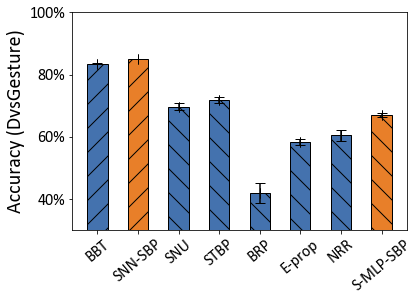

In [328]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)
print(dfacc)
values = dfacc.iloc[0,:]
methods = np.array(['BBT','SNN-SBP','SNU','STBP','BRP','E-prop','NRR', 'S-MLP-SBP'])
vars = dfacc.iloc[1,:]
mybar(ax,1,7)
plt.errorbar(np.arange(len(vars)),values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
plt.ylim((0.3, 1.0))
plt.ylabel('Accuracy (DvsGesture)',fontsize=20)
plt.xticks(range(len(methods)),methods,rotation=40)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
fig.savefig('Figure/DvsGesture_acc.eps',bbox_inches = 'tight')

### cost bar

	MIN
BBT        0.903316
SNN-SBP    0.790675
SNU        0.271051
SHI        0.212891
BRP        4.727809
Eprop      2.238820
NRR        1.201030
MLP-SBP    0.112900
dtype: float64
	MAX
BBT        2.273111
SNN-SBP    1.049261
SNU        0.465869
SHI        0.358429
BRP        5.901908
Eprop      4.661789
NRR        2.902930
MLP-SBP    0.199709
dtype: float64


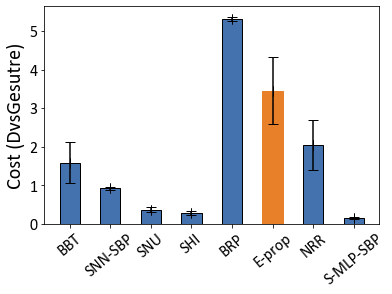

In [329]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)
values = df.iloc[0,:]/1e7
methods = np.array(['BBT','SNN-SBP','SNU','SHI','BRP','E-prop','NRR', 'S-MLP-SBP'])
vars = df.iloc[1,:]/1e7
barfigure = plt.bar(range(len(values)),values, width=.5,tick_label=methods, facecolor='#4472AE',edgecolor='black')
plt.errorbar(np.arange(len(vars)),values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
barfigure[5].set_color('#E87F29')
plt.ylabel('Cost (DvsGesutre)',fontsize=20)
plt.xticks(rotation=40)

min__ = df.iloc[0,:]/1e7 - df.iloc[1,:]/1e7 - df.iloc[0,:]/1e7 * 0.1
max__ = df.iloc[0,:]/1e7 + df.iloc[1,:]/1e7 + df.iloc[0,:]/1e7 * 0.1
print('\tMIN')
print(min__)
print('\tMAX')
print(max__)

           BBT   SNN-SBP       SNU       SHI       BRP     Eprop       NRR  \
mean  1.588213  0.919968  0.368460  0.285660  5.314858  3.450305  2.051980   
std   0.526076  0.037296  0.060563  0.044203  0.055563  0.866454  0.645752   

       MLP-SBP  
mean  0.156305  
std   0.027774  


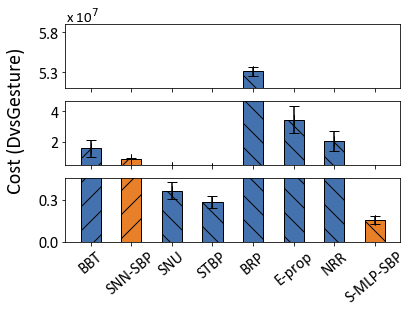

In [347]:
plt.rcParams.update({'font.size': 16})
fig, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True)
print(df/1e7)
values = df.iloc[0,:]/1e7
methods = np.array(['BBT','SNN-SBP','SNU','STBP','BRP','E-prop','NRR', 'S-MLP-SBP'])
vars = df.iloc[1,:]/1e7
mybar(ax,1,7)
mybar(ax2,1,7)
mybar(ax3,1,7)
ax.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax2.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax3.errorbar([x for x in range(len(values))],values, fmt=" ", yerr=vars, xerr=0, capsize=5,color='black')
ax3.set_ylim(0, 0.46)  # outliers only
ax2.set_ylim(0.5, 4.66)  # outliers only
ax.set_ylim(5.1, 5.9)  # outliers only
ax.set_yticks([5.3,5.8])
ax3.set_yticks([0,0.3])
ax3.set_ylabel('Cost (DvsGesture)',fontsize=20)
ax3.yaxis.set_label_coords(-0.12,1.9)
plt.xticks(range(len(methods)),methods,rotation=40)
plt.text(-0.6,1.58, 'x 10$^{7}$',fontsize=15)
fig.savefig('Figure/fig2n_DvsGesture_test.eps',bbox_inches = 'tight')

# Student distribution

In [195]:
from scipy.stats import ttest_ind,norm,f
import numpy as np
def ftest(s1,s2):
    print("Null Hypothesis:var(s1)=var(s2)，α=0.05")
    F = np.var(s1)/np.var(s2)
    v1 = len(s1) - 1
    v2 = len(s2) - 1
    p_val = 1 - 2*abs(0.5-f.cdf(F,v1,v2))
    print(p_val)
    if p_val < 0.05:
        equal_var=False
    else:
        equal_var=True
    return equal_var
         
def ttest_ind_fun(s1,s2):
    equal_var = ftest(s1,s2)
    print("Null Hypothesis:mean(s1)=mean(s2)，α=0.05")
    ttest,pval = ttest_ind(s1,s2,equal_var=equal_var)
    if pval < 0.05:
        print("Reject the Null Hypothesis.")
    else:
        print("Accept the Null Hypothesis.")
    return pval

s1 = norm.rvs(loc=1.12,scale=0.04,size=5)
s2 = norm.rvs(loc=4.35,scale=0.01,size=5)
# s1 = STP_MNIST_with.min(1)
# s2 = STP_MNIST_without.min(1)
ttest_ind_fun(s1,s2)

Null Hypothesis:var(s1)=var(s2)，α=0.05
0.1155399179623946
Null Hypothesis:mean(s1)=mean(s2)，α=0.05
Reject the Null Hypothesis.


1.4414143736547755e-16